In [2]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
"package 'tidyr' was built under R version 3.4.3"Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


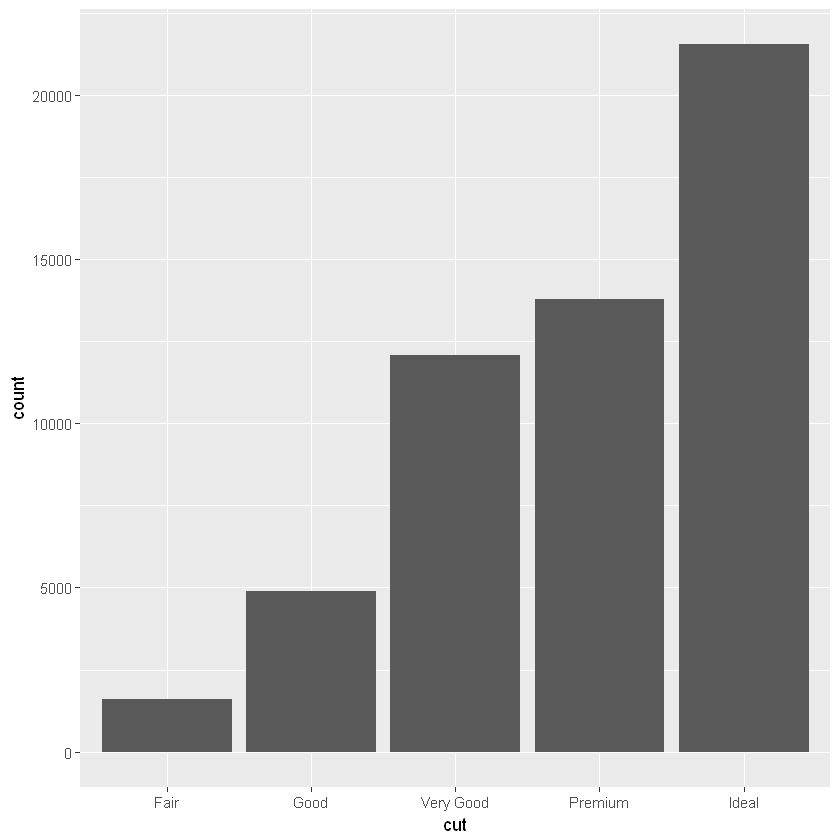

In [3]:
ggplot(diamonds, aes(cut)) +
geom_bar()

In [7]:
diamonds %>%
count(cut)

cut,n
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


In [8]:
diamonds %>%
group_by(cut) %>%
summarize(n = n())

cut,n
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


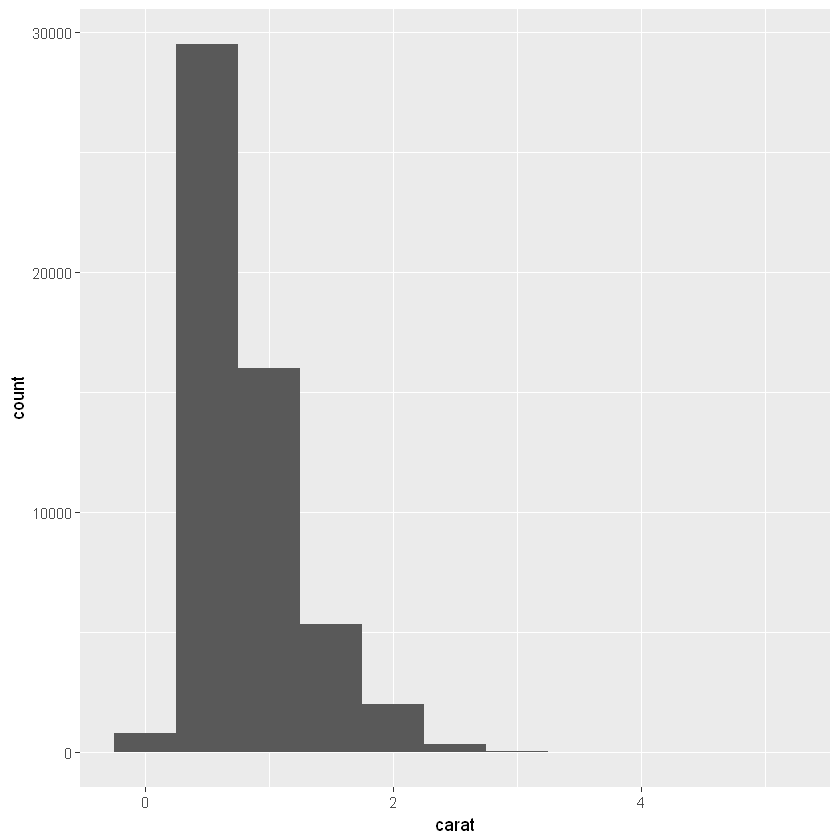

In [10]:
ggplot(diamonds, aes(carat)) +
geom_histogram(binwidth = 0.5)

In [45]:
dfcut <- diamonds %>%
count(cut_width(carat, 0.5))

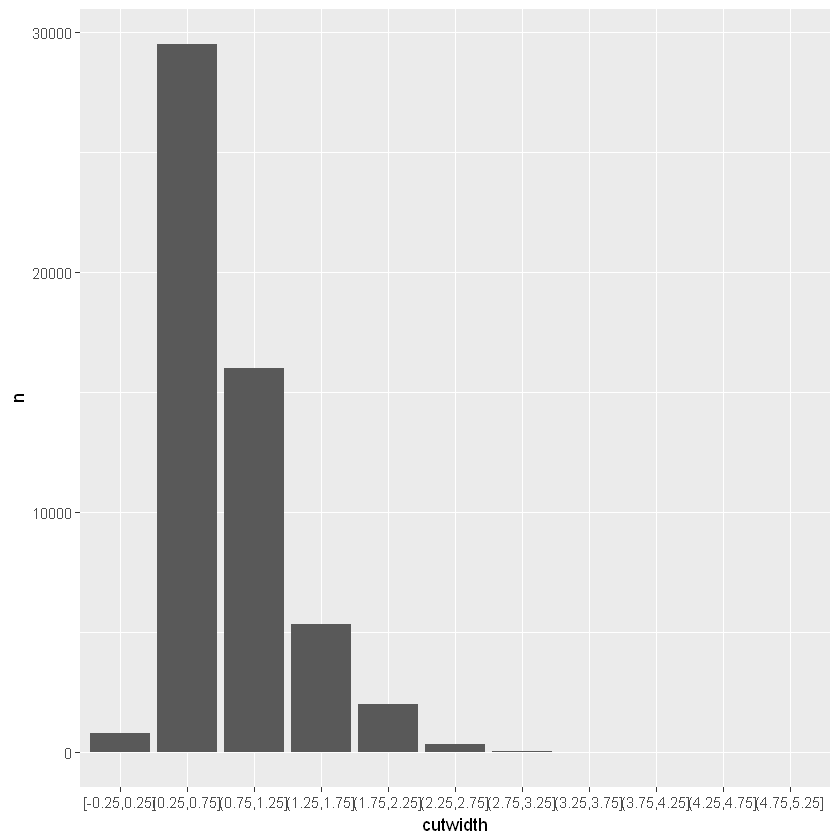

In [47]:
names(dfcut) <- c('cutwidth', 'n')
ggplot(dfcut) +
geom_bar(aes(cutwidth, n), stat = 'identity')

In [49]:
smaller <- diamonds %>%
filter(carat < 3)

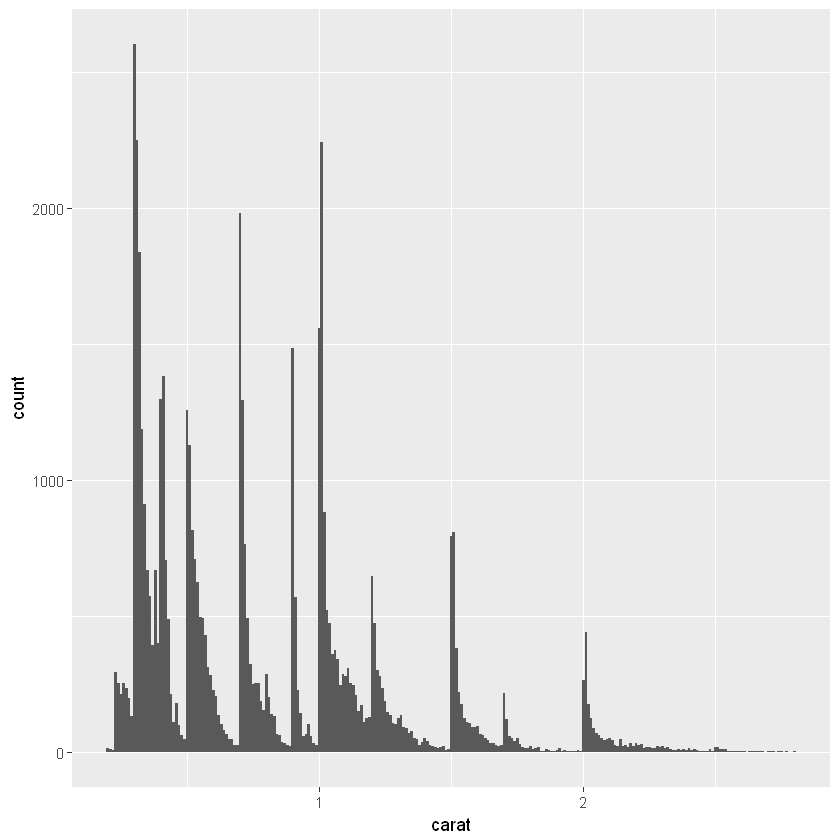

In [52]:
ggplot(smaller, aes(carat)) +
geom_histogram(binwidth = 0.01)

In [53]:
head(faithful)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


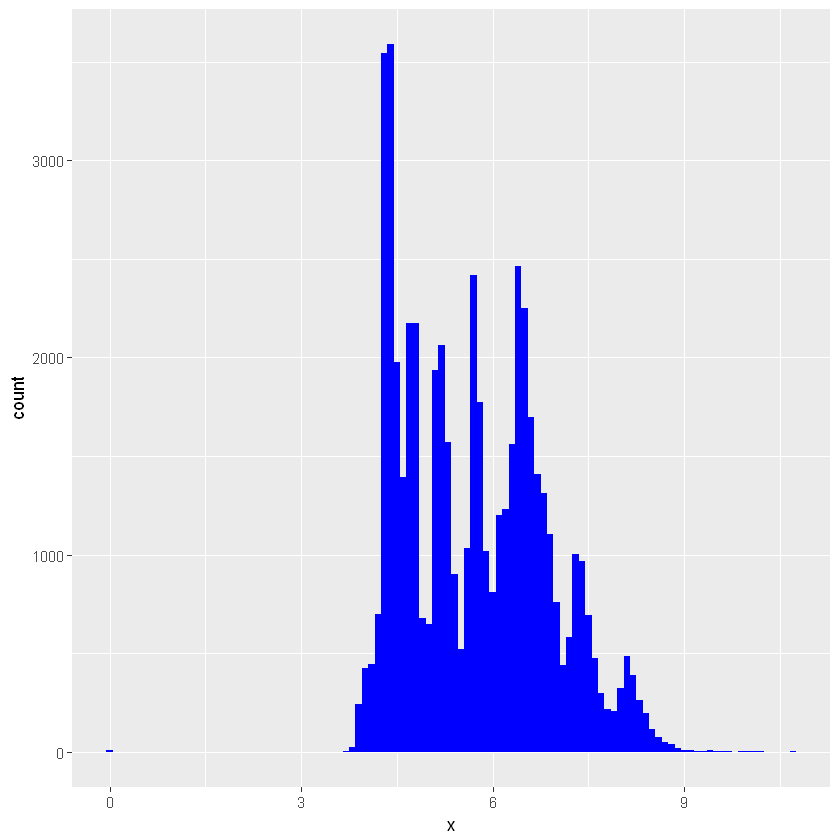

In [61]:
# 1
ggplot(diamonds) +
geom_histogram(aes(x), binwidth = 0.1, fill = 'blue') +


In [82]:
library(reshape2)
diamonds_melted <- melt(diamonds,
                       measure.vars = c('x', 'y', 'z')) %>% rename(dimension = variable)

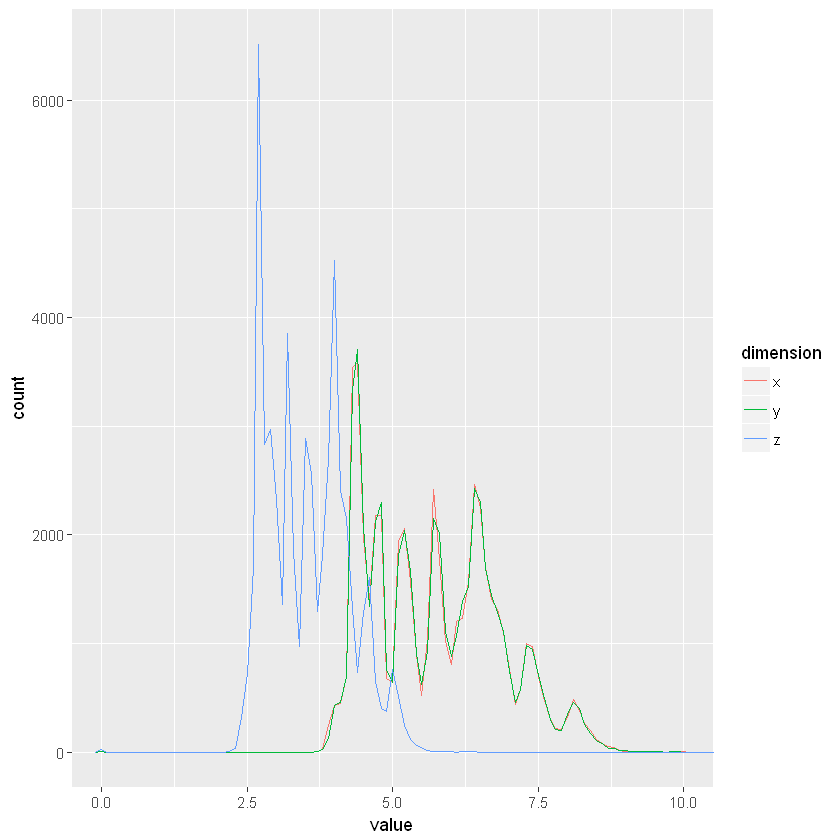

In [93]:
ggplot(diamonds_melted, aes(value)) +
geom_freqpoly(aes(color = dimension), binwidth = 0.1) +
coord_cartesian(xlim = c(0, 10))

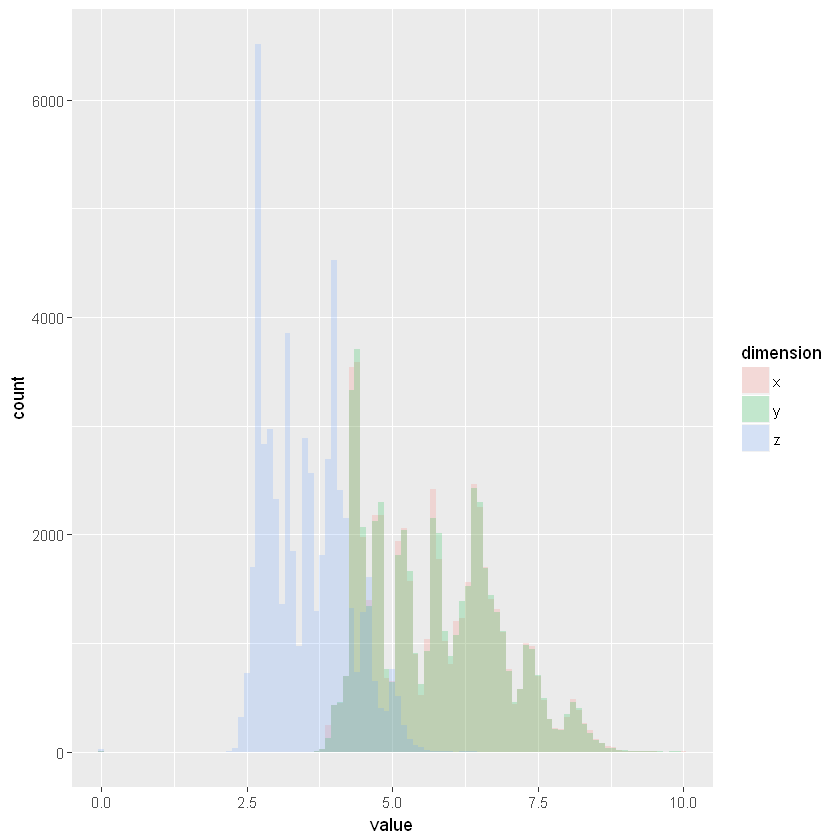

In [96]:
ggplot(diamonds_melted, aes(value)) +
geom_histogram(aes(fill = dimension), binwidth = 0.1, position = 'identity', alpha = 0.2) +
coord_cartesian(xlim = c(0, 10))

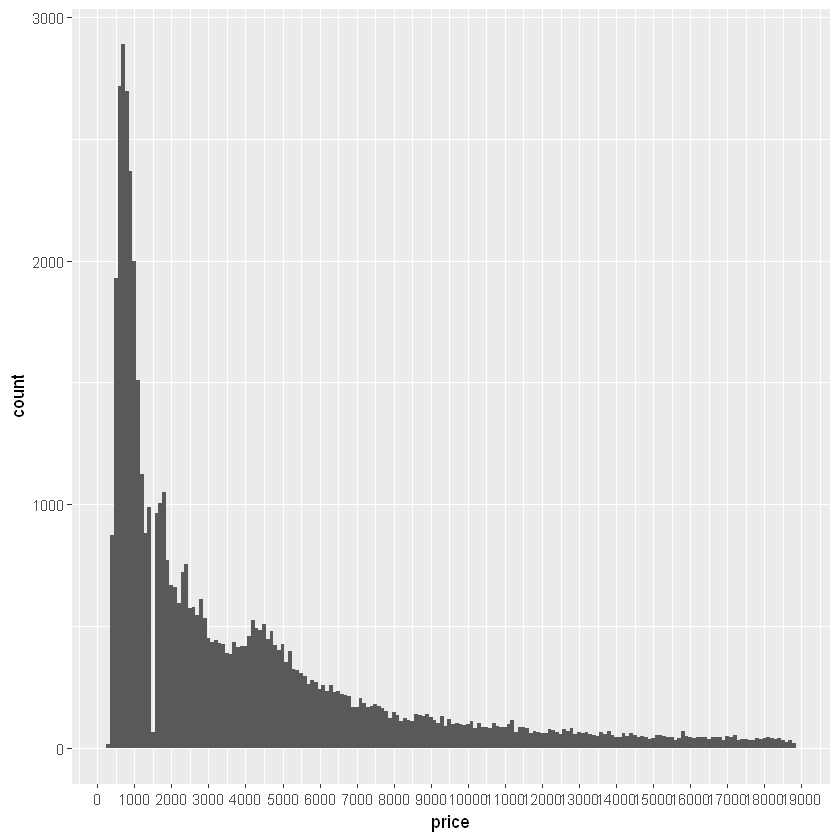

In [110]:
ggplot(diamonds, aes(price)) +
geom_histogram(binwidth = 100) +
scale_x_continuous(breaks = seq(0, 19000, 1000))

In [114]:
diamonds %>%
filter(carat == 0.99 | carat == 1) %>%
group_by(carat) %>%
count()

carat,n
0.99,23
1.00,1558


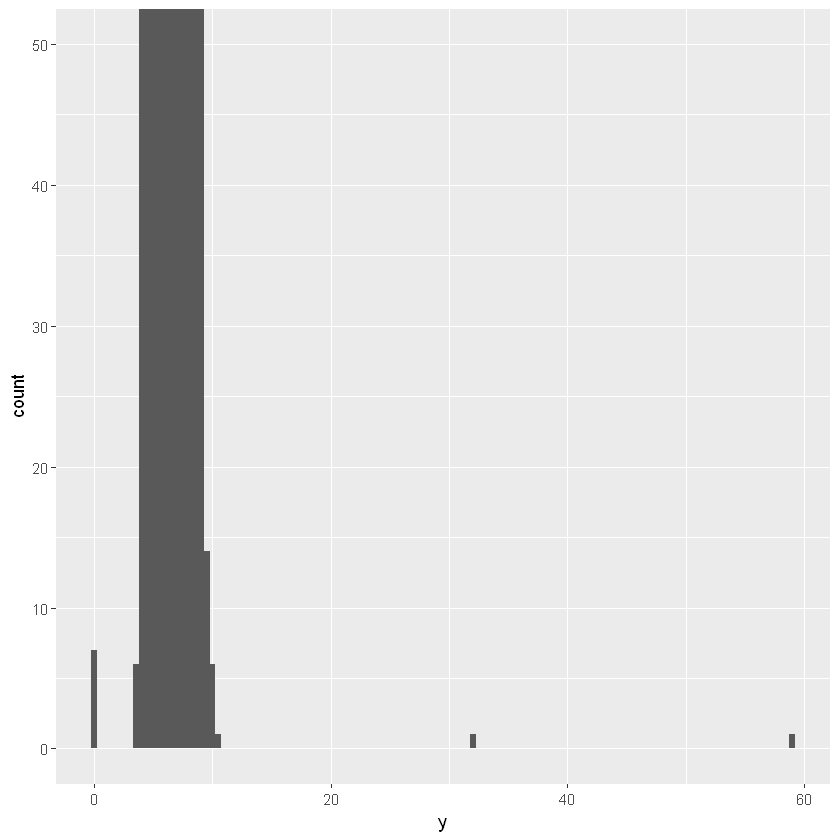

In [115]:
ggplot(diamonds) +
geom_histogram(aes(y), binwidth = 0.5) +
coord_cartesian(ylim = c(0, 50))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 3 rows containing missing values (geom_bar)."

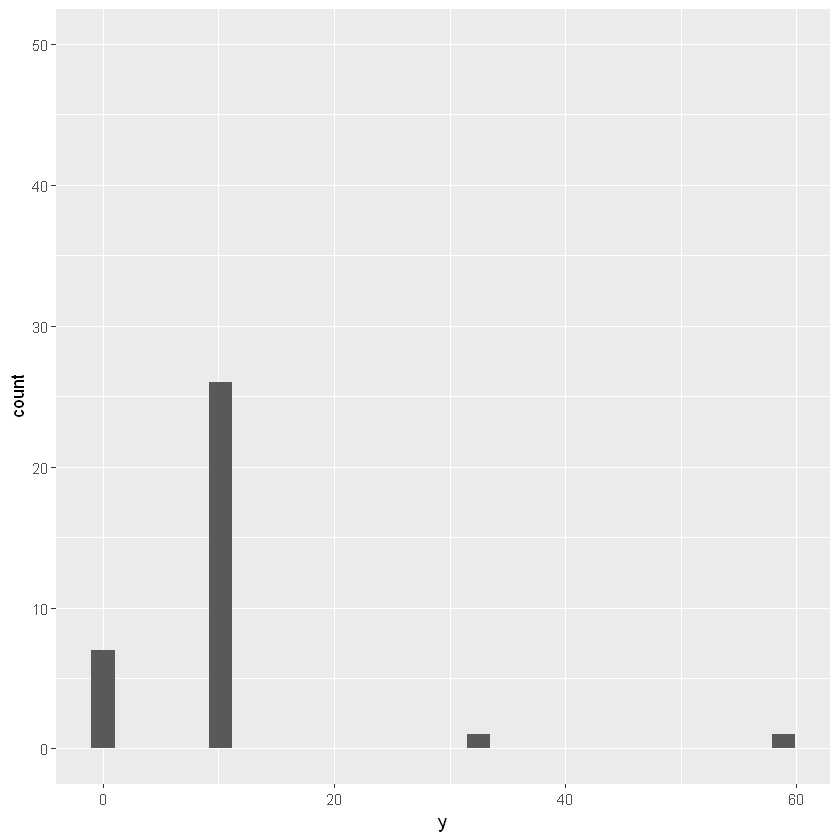

In [128]:
ggplot(diamonds) +
geom_histogram(aes(y)) +
ylim(0, 50)

In [127]:
diamonds %>%
count(cut_width(y, 0.5)) %>%
rename(y_interval = 'cut_width(y, 0.5)') %>%
mutate(new_n = ifelse(n < 50, n, 0)) 

"cut_width(y, 0.5)",n
"[-0.25,0.25]",7
"(3.25,3.75]",6
"(3.75,4.25]",1730
"(4.25,4.75]",12566
"(4.75,5.25]",7556
"(5.25,5.75]",6272
"(5.75,6.25]",6464
"(6.25,6.75]",9382
"(6.75,7.25]",4176
"(7.25,7.75]",3425


In [130]:
data(diamonds)

In [144]:
diamonds_3 <- diamonds %>%
mutate(y = ifelse(y < 3 | y > 20, NA, y))

In [149]:
diamonds_3 %>%
filter(is.na(y))

carat,cut,color,clarity,depth,table,price,x,y,z
1.00,Very Good,H,VS2,63.3,53,5139,0.00,NA,0.00
1.14,Fair,G,VS1,57.5,67,6381,0.00,NA,0.00
2.00,Premium,H,SI2,58.9,57,12210,8.09,NA,8.06
1.56,Ideal,G,VS2,62.2,54,12800,0.00,NA,0.00
1.20,Premium,D,VVS1,62.1,59,15686,0.00,NA,0.00
2.25,Premium,H,SI2,62.8,59,18034,0.00,NA,0.00
0.51,Ideal,E,VS1,61.8,55,2075,5.15,NA,5.12
0.71,Good,F,SI2,64.1,60,2130,0.00,NA,0.00
0.71,Good,F,SI2,64.1,60,2130,0.00,NA,0.00


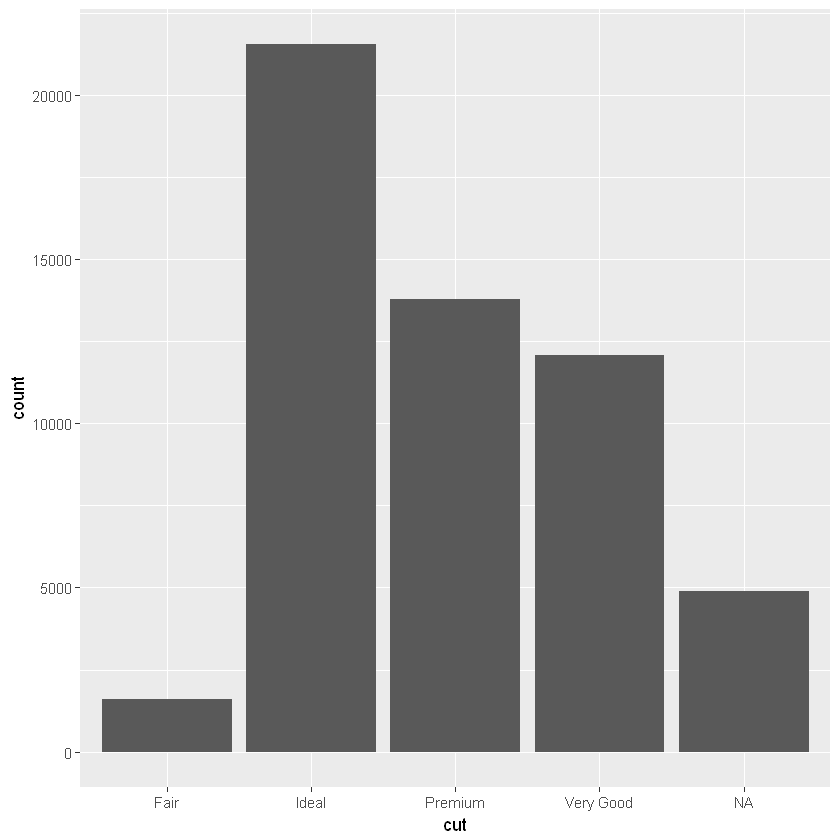

In [174]:
diamonds %>%
mutate(cut = ifelse(cut == 'Good', NA, as.character(cut))) %>%
ggplot(aes(cut)) +
geom_bar()

In [175]:
class(factor(diamonds$cut))

[1] "ordered" "factor"

Warning message:
"Removed 9 rows containing non-finite values (stat_bin)."

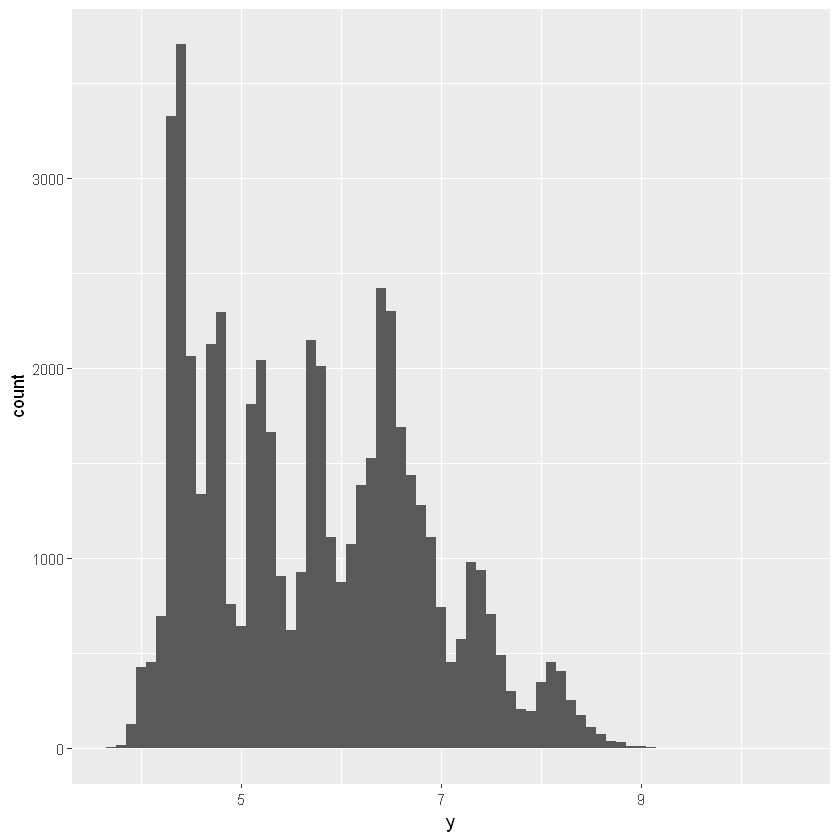

In [148]:
ggplot(diamonds_3, aes(y)) +
geom_histogram(binwidth = 0.1)

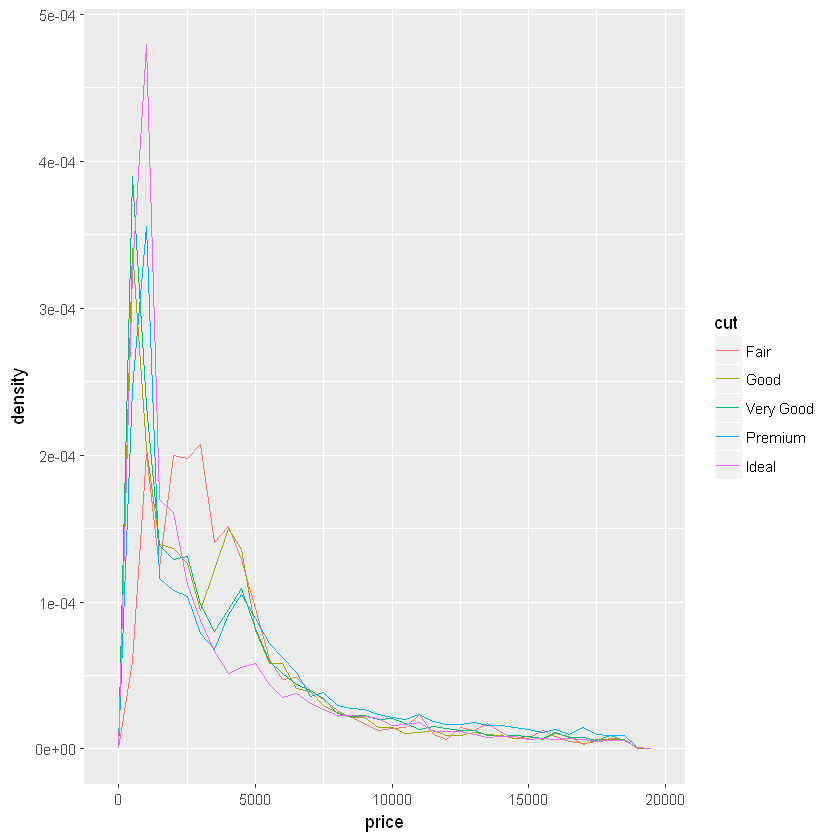

In [191]:
ggplot(diamonds, aes(price, ..density..)) +
geom_freqpoly(aes(color = cut), binwidth = 500)

In [193]:
diamonds %>%
group_by(cut) %>%
summarize(avg_price = mean(price, na.rm = TRUE)) %>%
arrange(desc(avg_price))

cut,avg_price
Premium,4584.258
Fair,4358.758
Very Good,3981.760
Good,3928.864
Ideal,3457.542


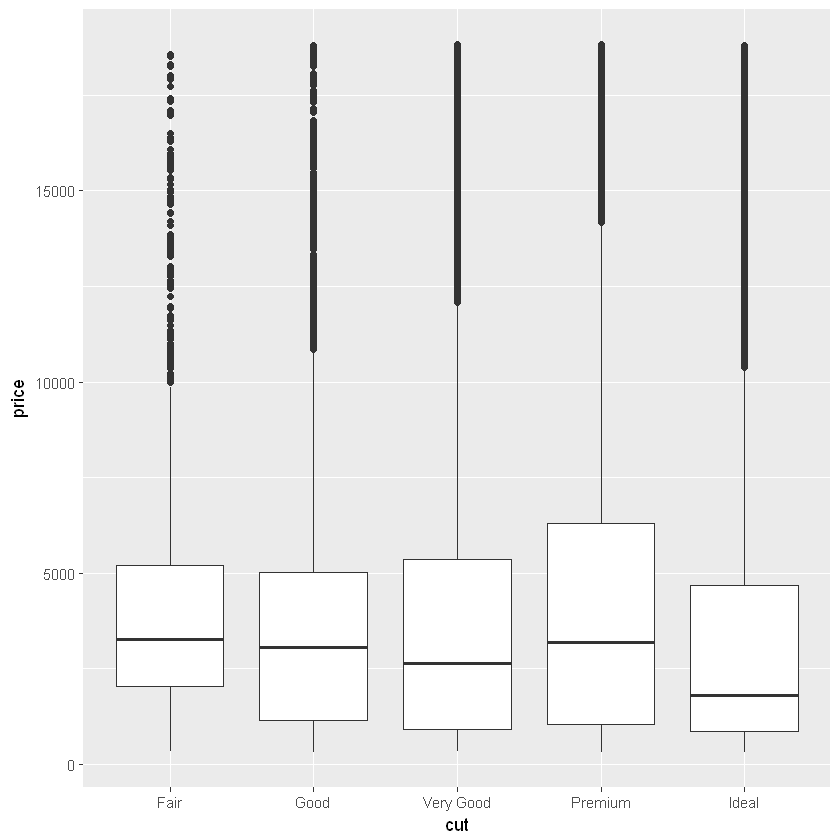

In [194]:
ggplot(diamonds, aes(cut, price)) +
geom_boxplot()

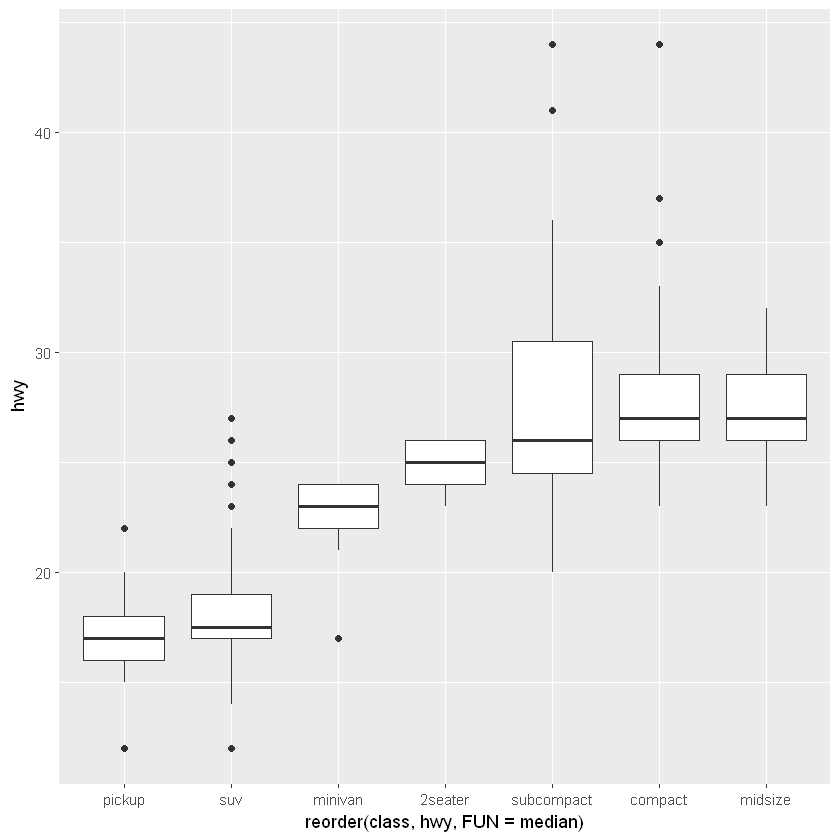

In [203]:
ggplot(mpg) +
geom_boxplot(aes(reorder(class, hwy, FUN = median), y = hwy))

In [208]:
library(nycflights13)

Warning message:
"package 'nycflights13' was built under R version 3.4.3"

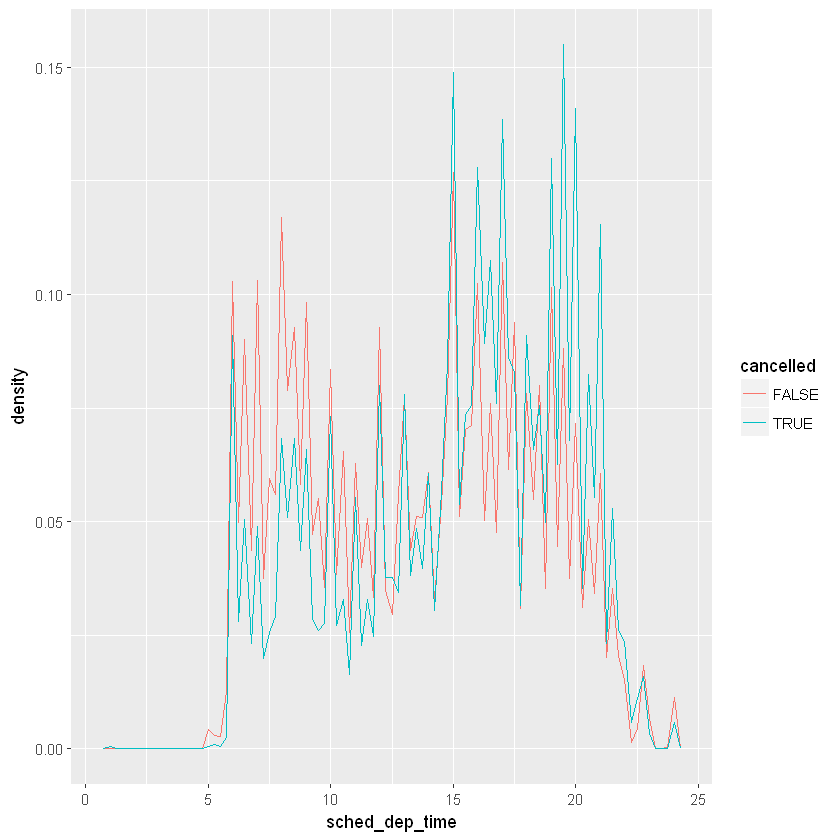

In [215]:
flights %>%
mutate(cancelled = is.na(dep_time),
      sched_hour = sched_dep_time %/% 100,
      sched_min = sched_dep_time %% 100,
      sched_dep_time = sched_hour + sched_min / 60) %>%
ggplot(aes(sched_dep_time, ..density..)) +
geom_freqpoly(aes(color = cancelled), binwidth = 1/4)

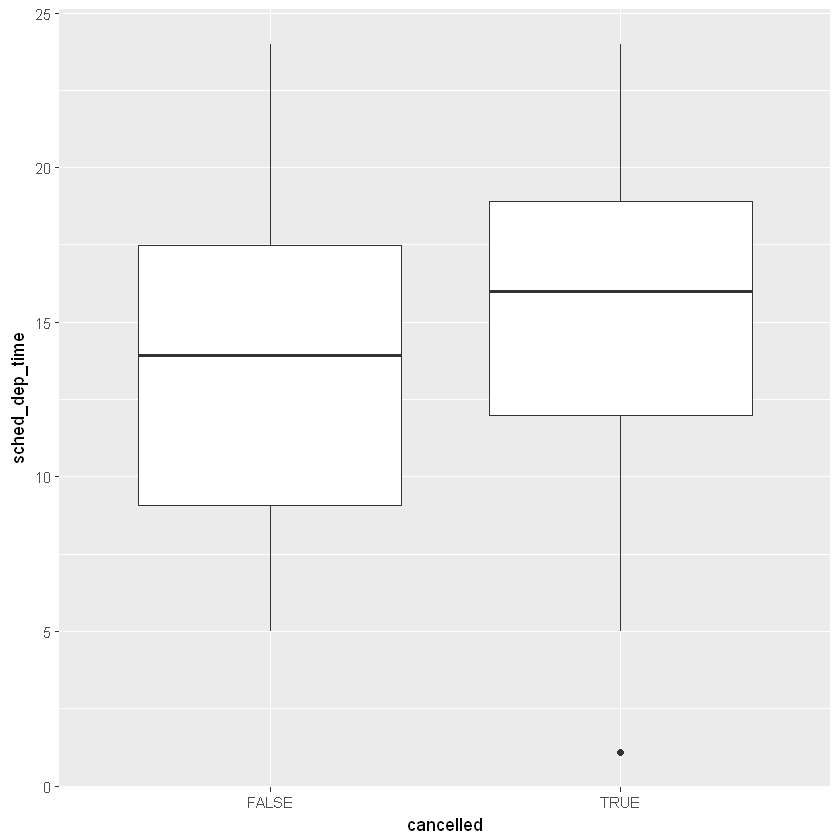

In [216]:
flights %>%
mutate(cancelled = is.na(dep_time),
      sched_hour = sched_dep_time %/% 100,
      sched_min = sched_dep_time %% 100,
      sched_dep_time = sched_hour + sched_min / 60) %>%
ggplot(aes(cancelled, sched_dep_time)) +
geom_boxplot()

In [217]:
names(diamonds)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

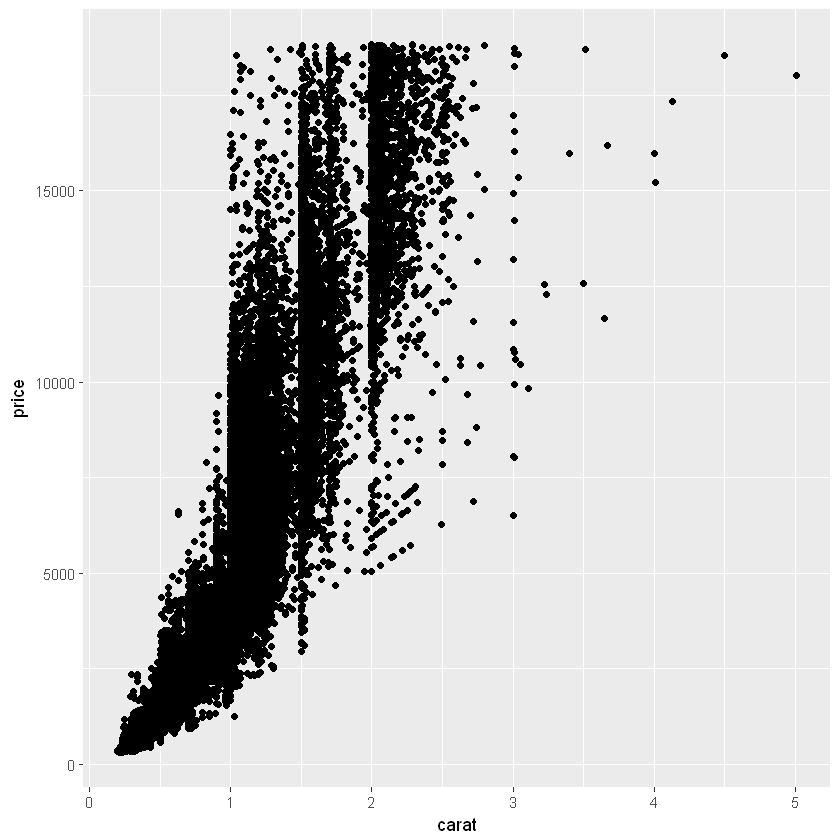

In [221]:
diamonds %>%
ggplot(aes(carat, price)) +
geom_point()

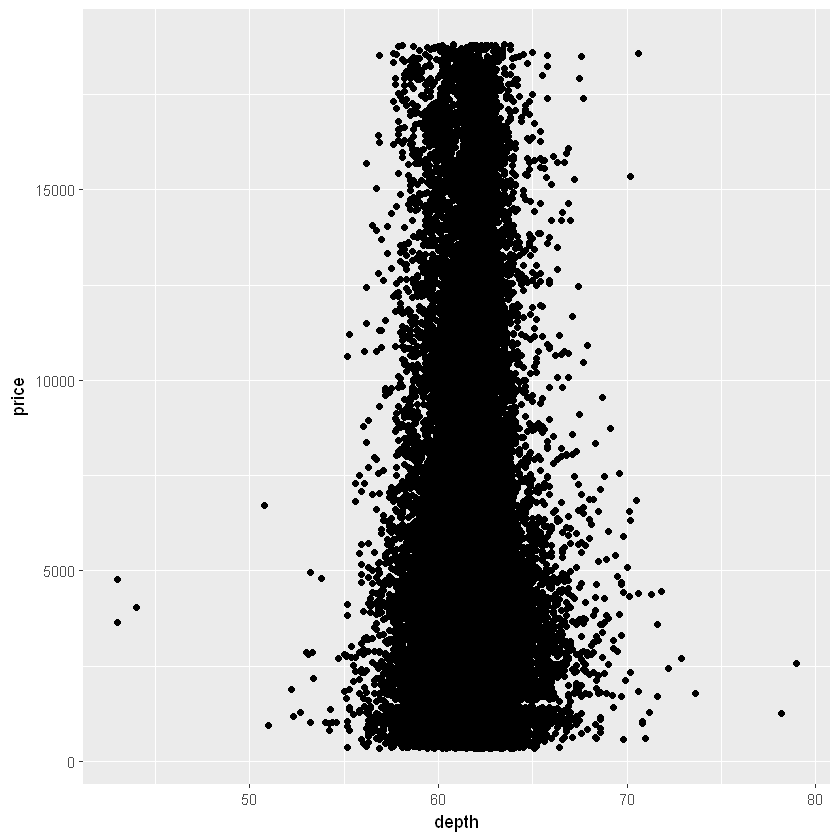

In [222]:
diamonds %>%
ggplot(aes(depth, price)) +
geom_point()

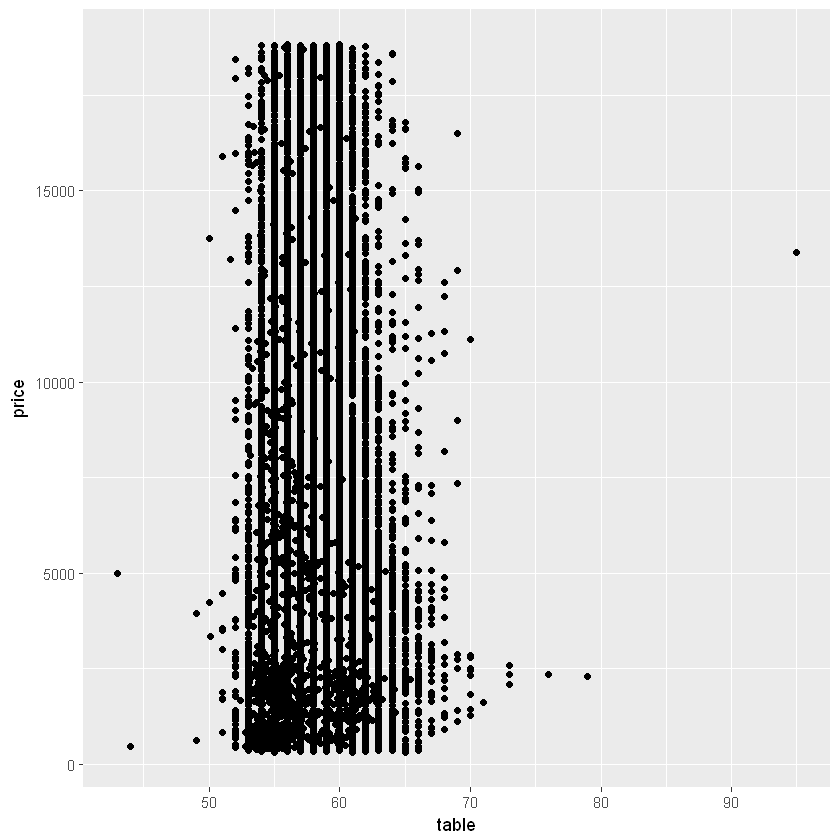

In [223]:
diamonds %>%
ggplot(aes(table, price)) +
geom_point()

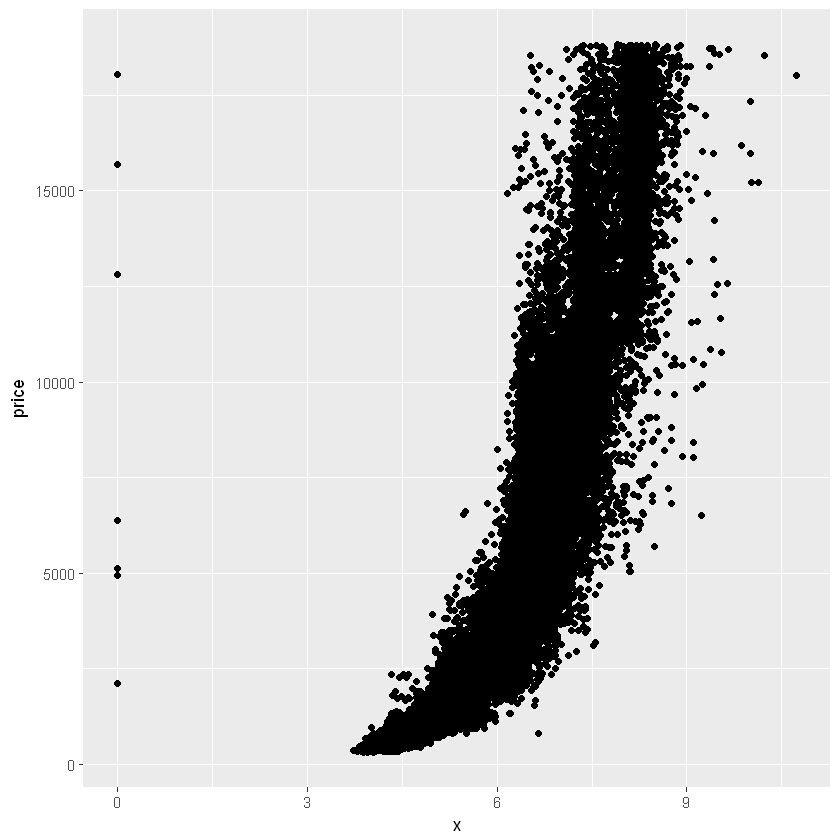

In [225]:
diamonds %>%
ggplot(aes(x, price)) +
geom_point()

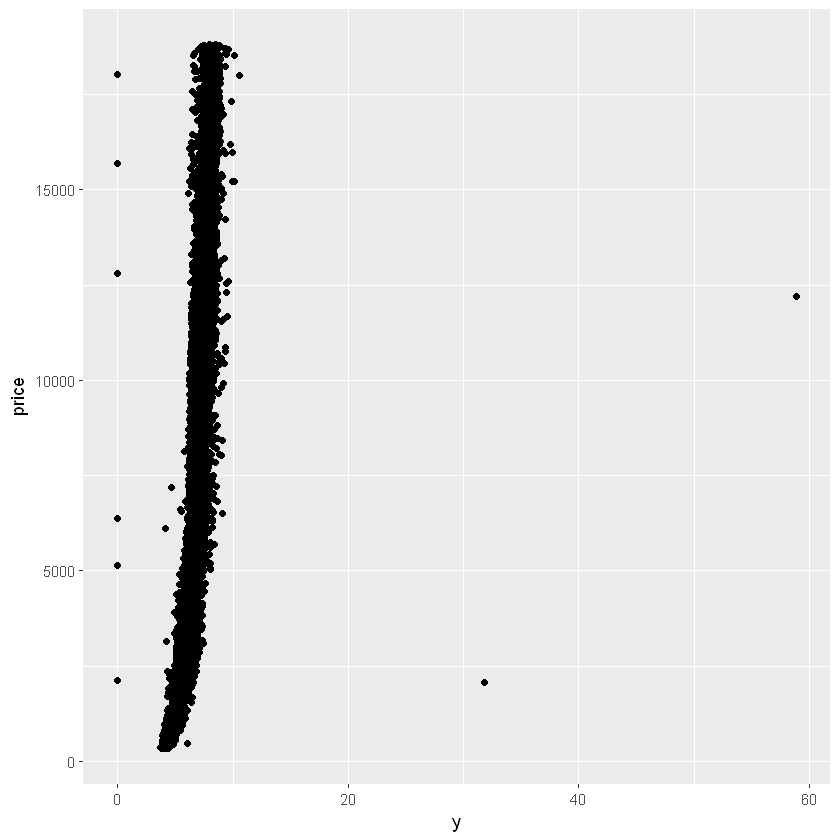

In [226]:
diamonds %>%
ggplot(aes(y, price)) +
geom_point()

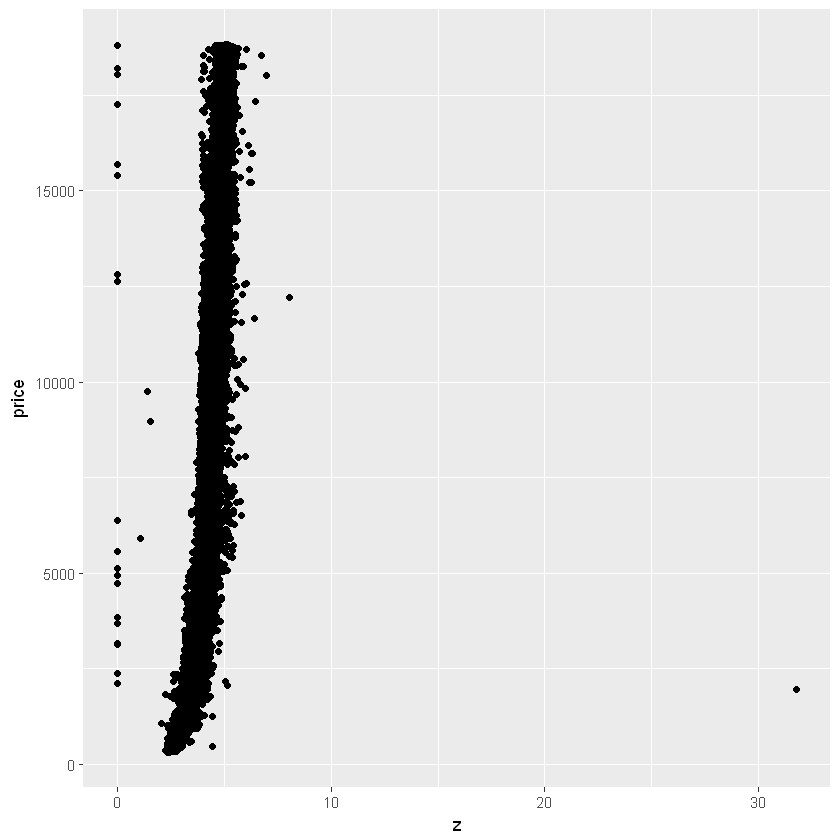

In [227]:
diamonds %>%
ggplot(aes(z, price)) +
geom_point()

In [228]:
str(diamonds)

Classes 'tbl_df', 'tbl' and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


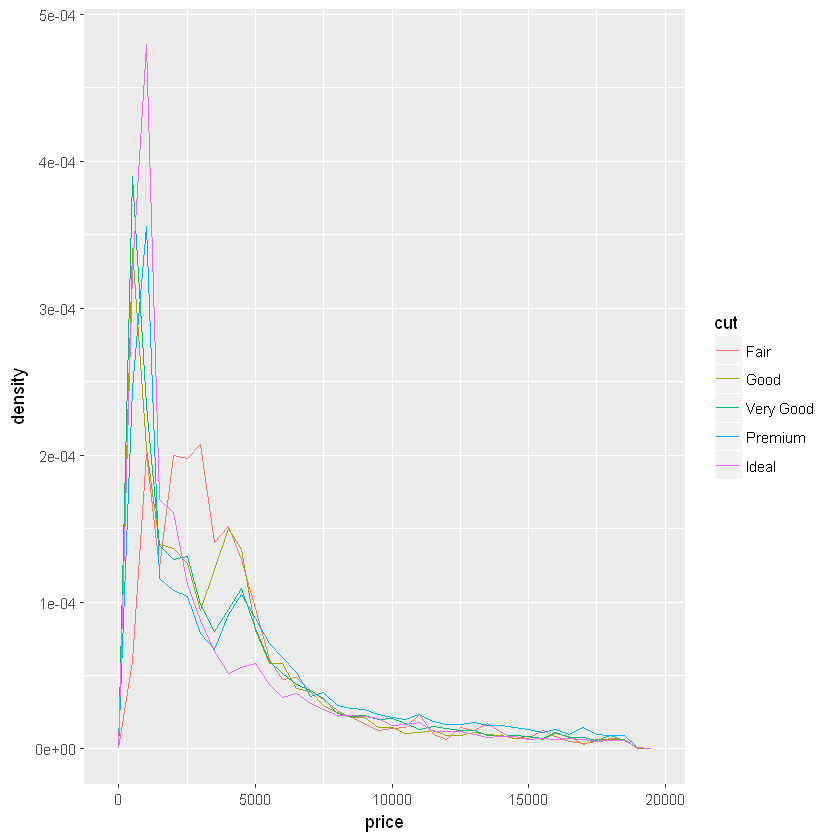

In [231]:
diamonds %>%
ggplot(aes(price, ..density..)) +
geom_freqpoly(aes(color = cut), binwidth = 500)

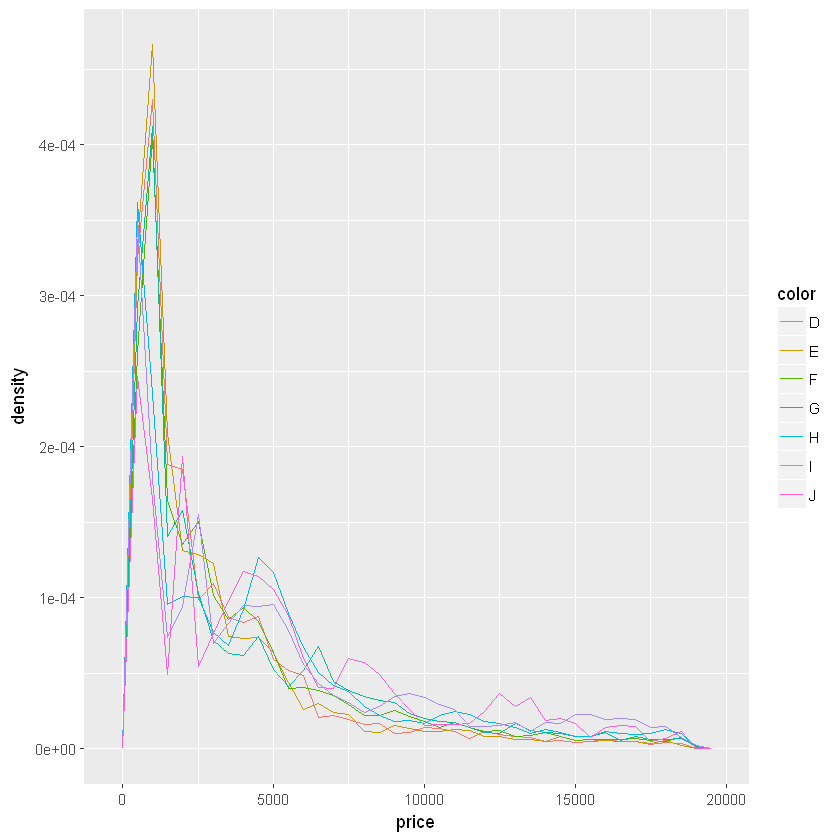

In [232]:
diamonds %>%
ggplot(aes(price, ..density..)) +
geom_freqpoly(aes(color = color), binwidth = 500)

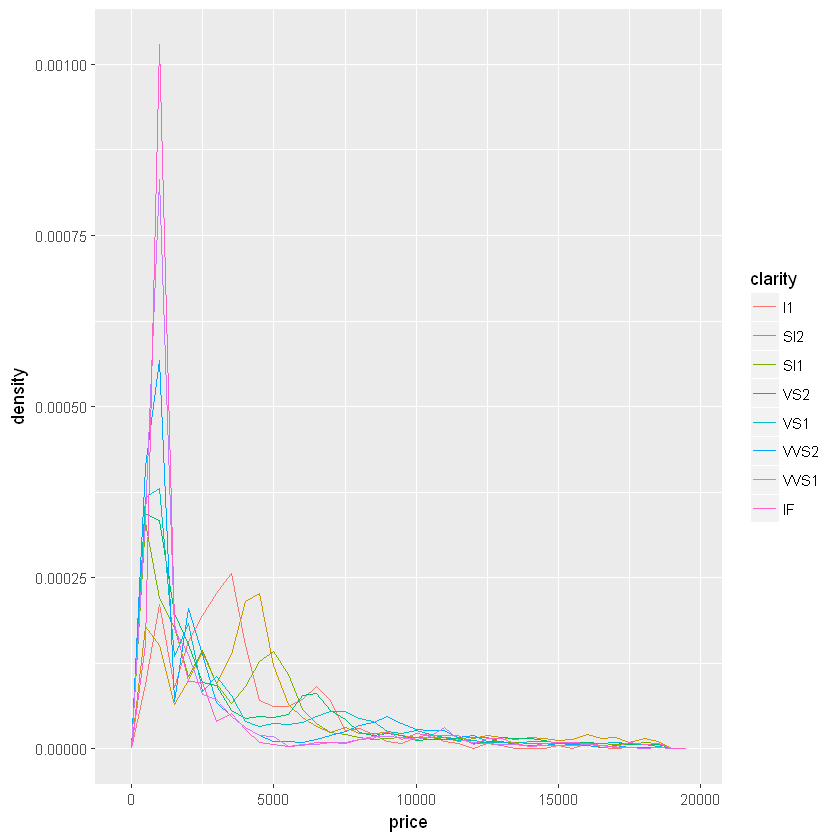

In [234]:
diamonds %>%
ggplot(aes(price, ..density..)) +
geom_freqpoly(aes(color = clarity), binwidth = 500)

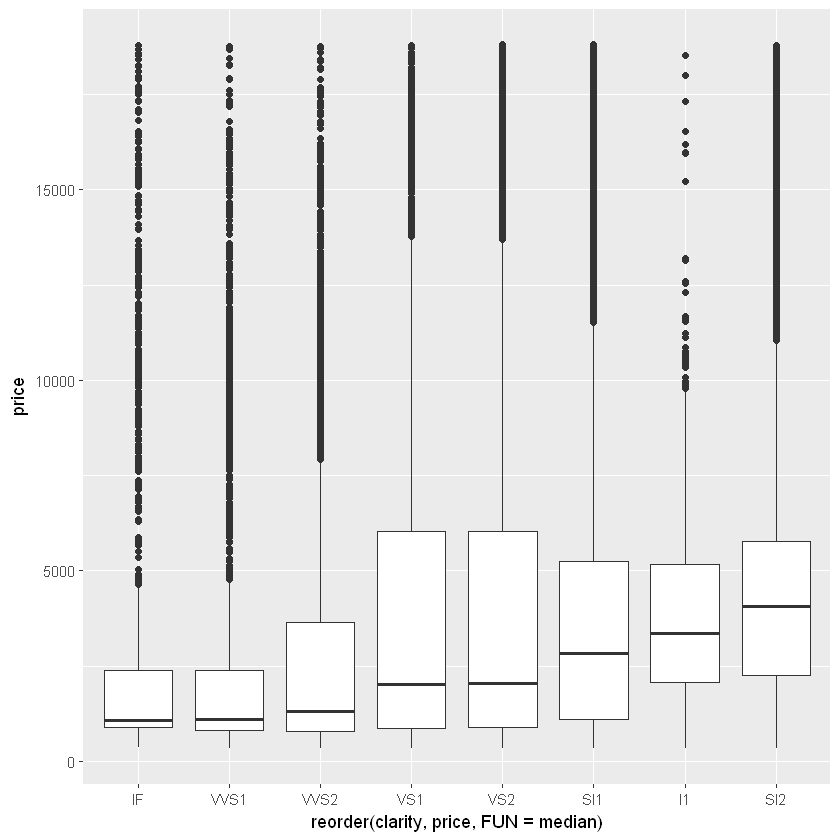

In [237]:
diamonds %>%
ggplot(aes(reorder(clarity, price, FUN = median), price)) +
geom_boxplot()

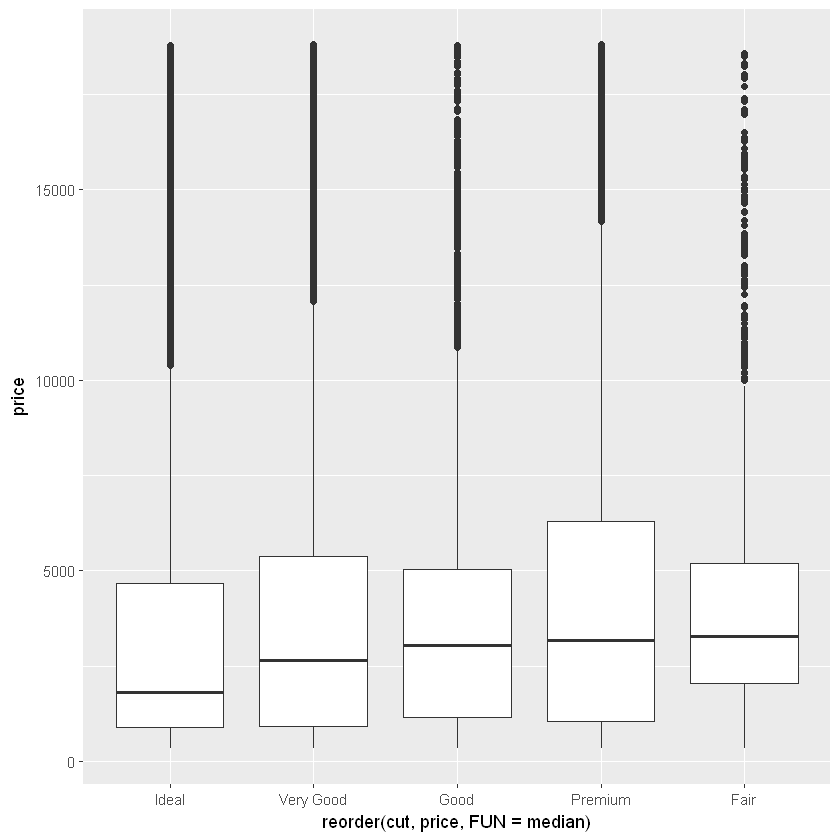

In [238]:
diamonds %>%
ggplot(aes(reorder(cut, price, FUN = median), price)) +
geom_boxplot()

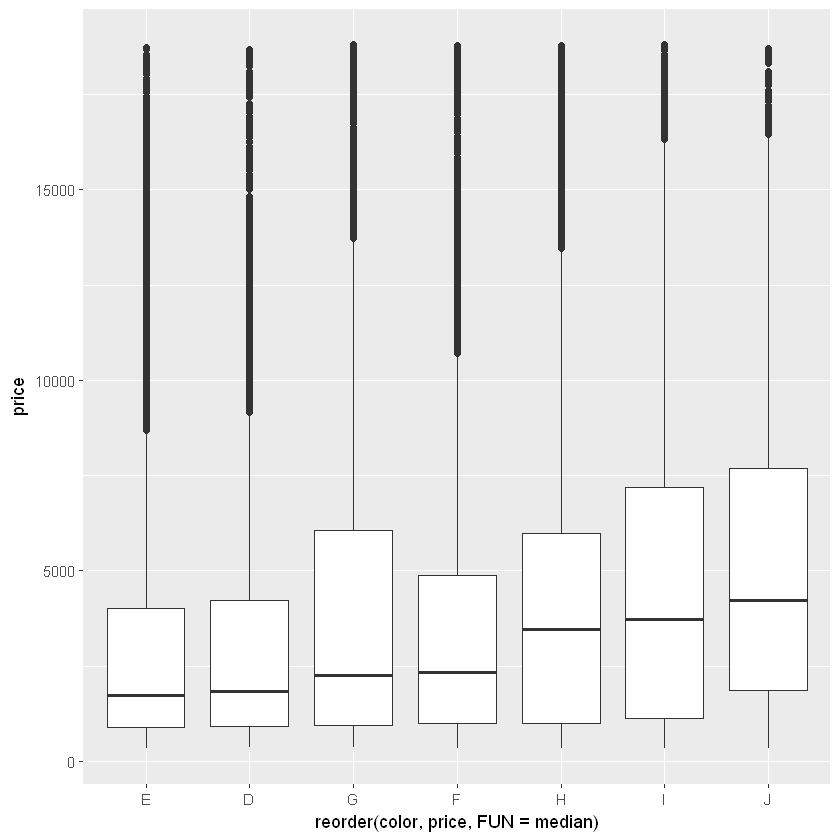

In [239]:
diamonds %>%
ggplot(aes(reorder(color, price, FUN = median), price)) +
geom_boxplot()

In [241]:
install.packages('ggstance', 'C:\\Users\\nguye\\Anaconda3\\R\\library', repo='https://mirror.vinahost.vn/CRAN/', dependencies = TRUE)

also installing the dependencies 'fontBitstreamVera', 'fontLiberation', 'cli', 'praise', 'fontquiver', 'gdtools', 'svglite', 'testthat', 'vdiffr'



package 'fontBitstreamVera' successfully unpacked and MD5 sums checked
package 'fontLiberation' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'praise' successfully unpacked and MD5 sums checked
package 'fontquiver' successfully unpacked and MD5 sums checked
package 'gdtools' successfully unpacked and MD5 sums checked
package 'svglite' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'vdiffr' successfully unpacked and MD5 sums checked
package 'ggstance' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nguye\AppData\Local\Temp\Rtmpy0f0gI\downloaded_packages


In [242]:
library(ggstance)

Warning message:
"package 'ggstance' was built under R version 3.4.3"
Attaching package: 'ggstance'

The following objects are masked from 'package:ggplot2':

    geom_errorbarh, GeomErrorbarh



In [260]:
diamonds2 <- diamonds %>%
select(color, price) %>%
mutate(color = as.character(color))

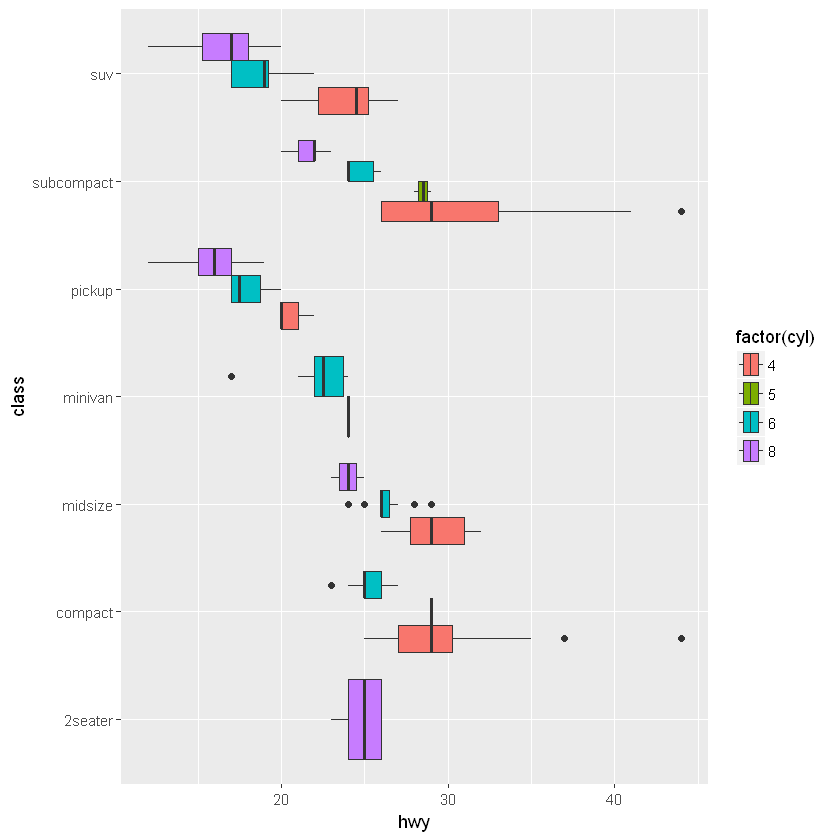

In [245]:
ggplot(mpg, aes(hwy, class, fill = factor(cyl))) +
  geom_boxploth()

In [262]:
str(diamonds2)

Classes 'tbl_df', 'tbl' and 'data.frame':	53940 obs. of  2 variables:
 $ color: chr  "E" "E" "E" "I" ...
 $ price: int  326 326 327 334 335 336 336 337 337 338 ...


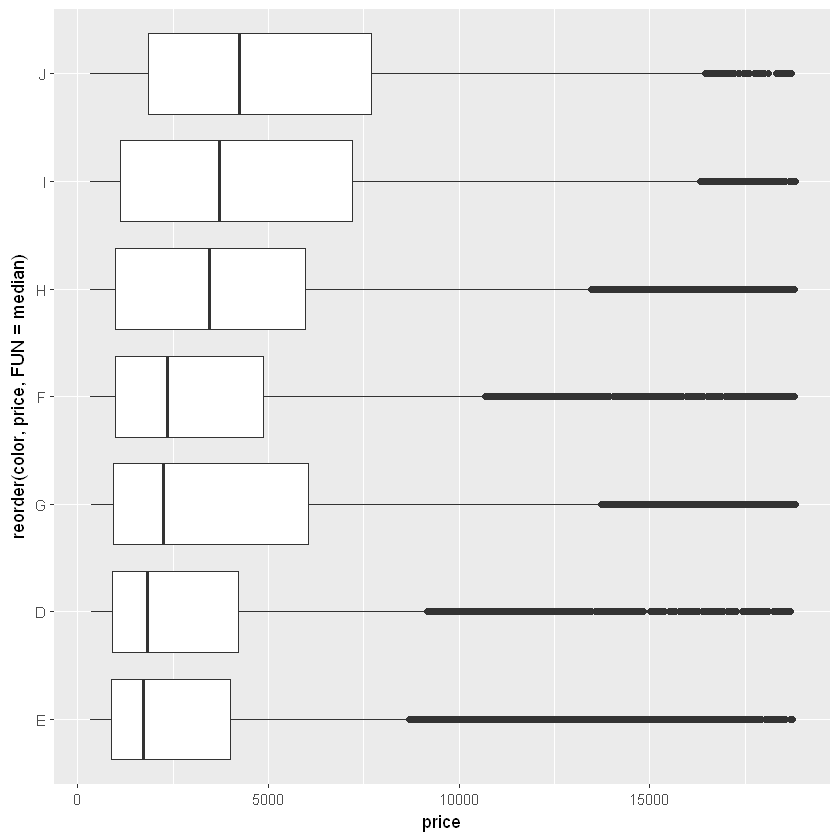

In [268]:
diamonds %>%
ggplot(aes(price, reorder(color, price, FUN = median))) +
geom_boxploth()

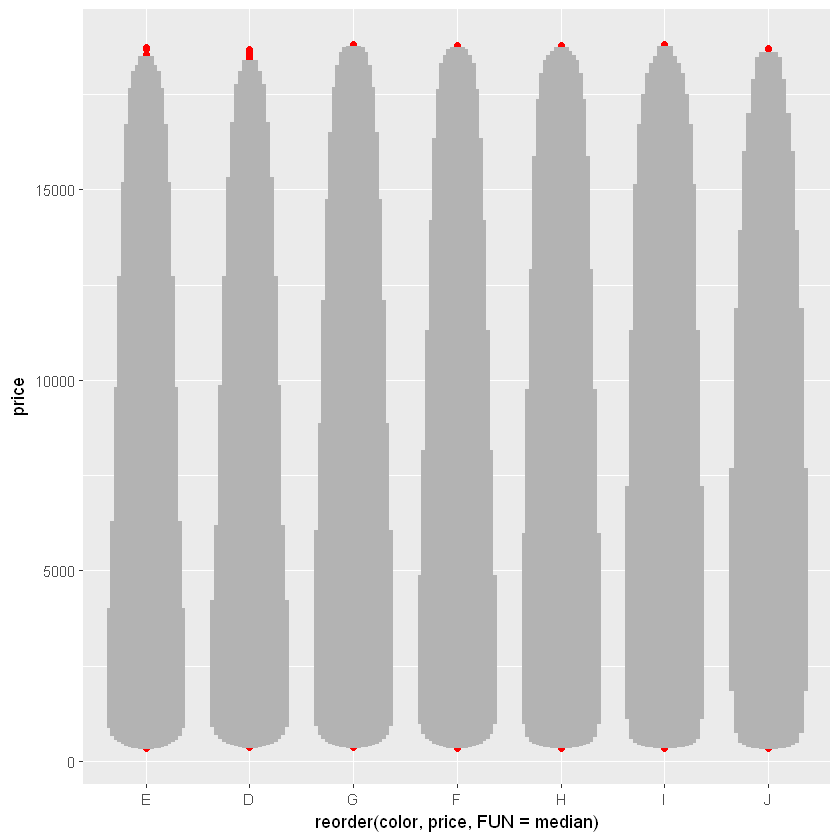

In [285]:
diamonds %>%
ggplot(aes(reorder(color, price, FUN = median), price)) +
geom_lv(outlier.colour = 'red') 

In [300]:
str(mpg)

Classes 'tbl_df', 'tbl' and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


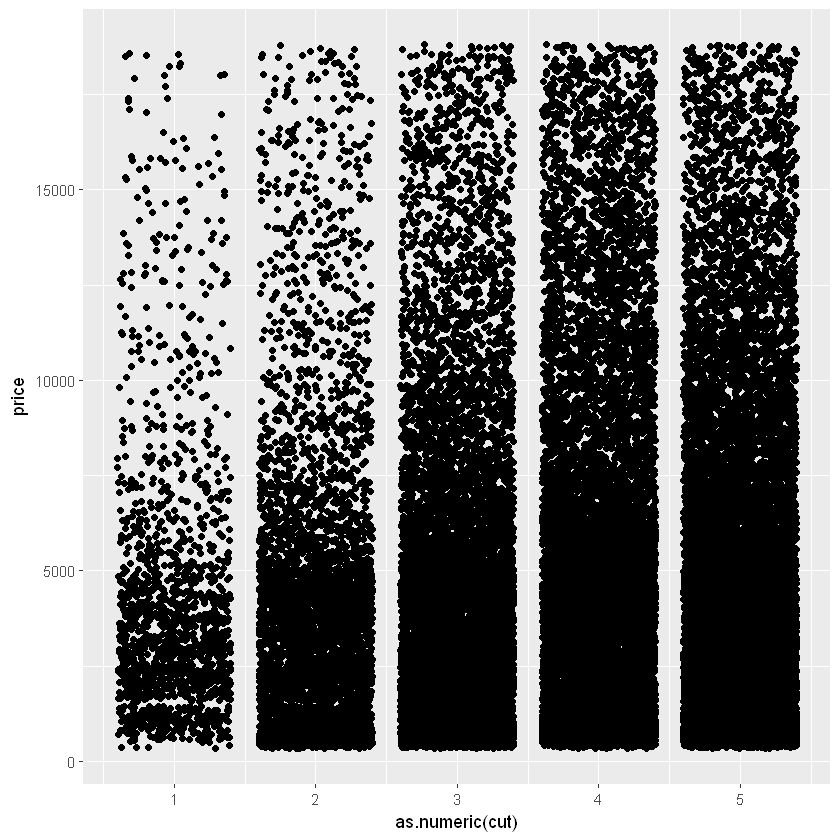

In [299]:
ggplot(diamonds, aes(as.numeric(cut), price)) +
geom_point(position = 'jitter')

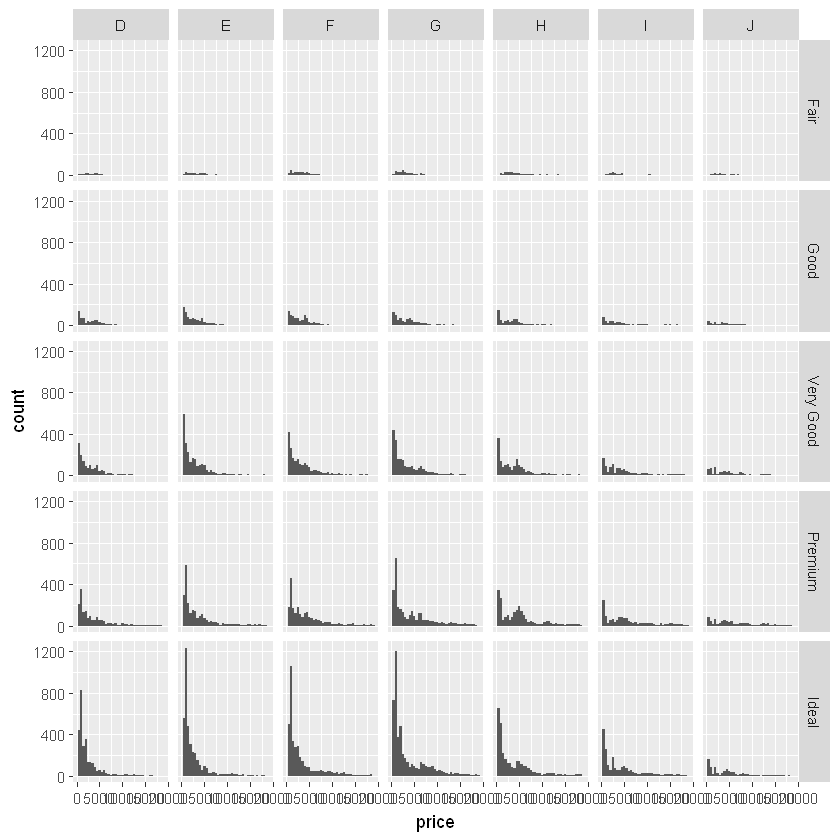

In [296]:
diamonds %>%
ggplot(aes(price)) +
geom_histogram(binwidth = 500) +
facet_grid(cut ~ color)

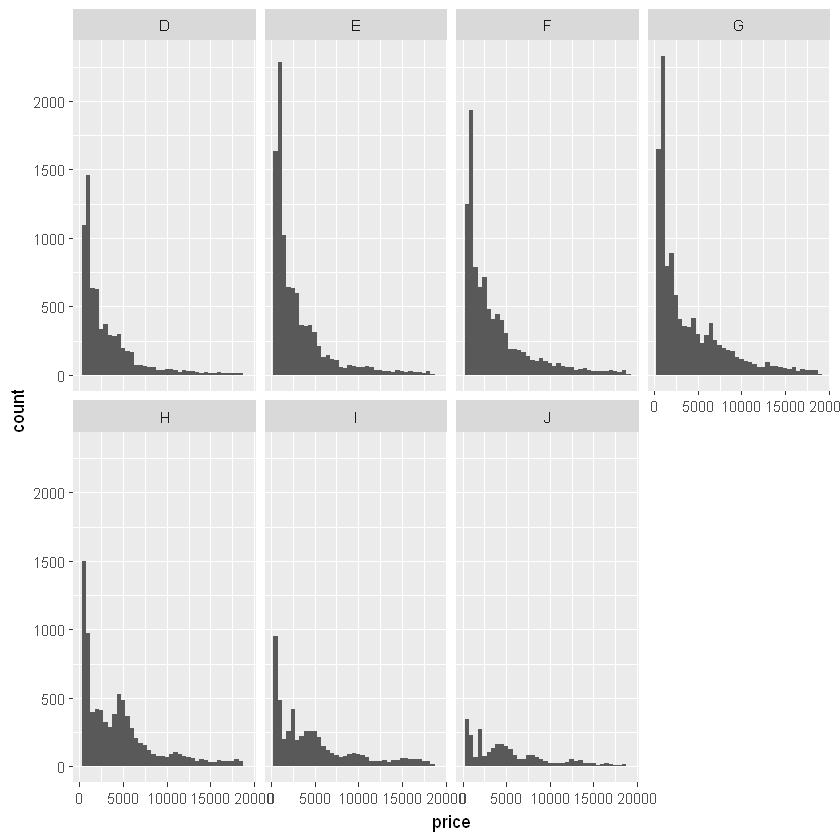

In [295]:
diamonds %>%
ggplot(aes(price)) +
geom_histogram(binwidth = 500) +
facet_wrap(~ color, nrow = 2)

In [290]:
str(diamonds)

Classes 'tbl_df', 'tbl' and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


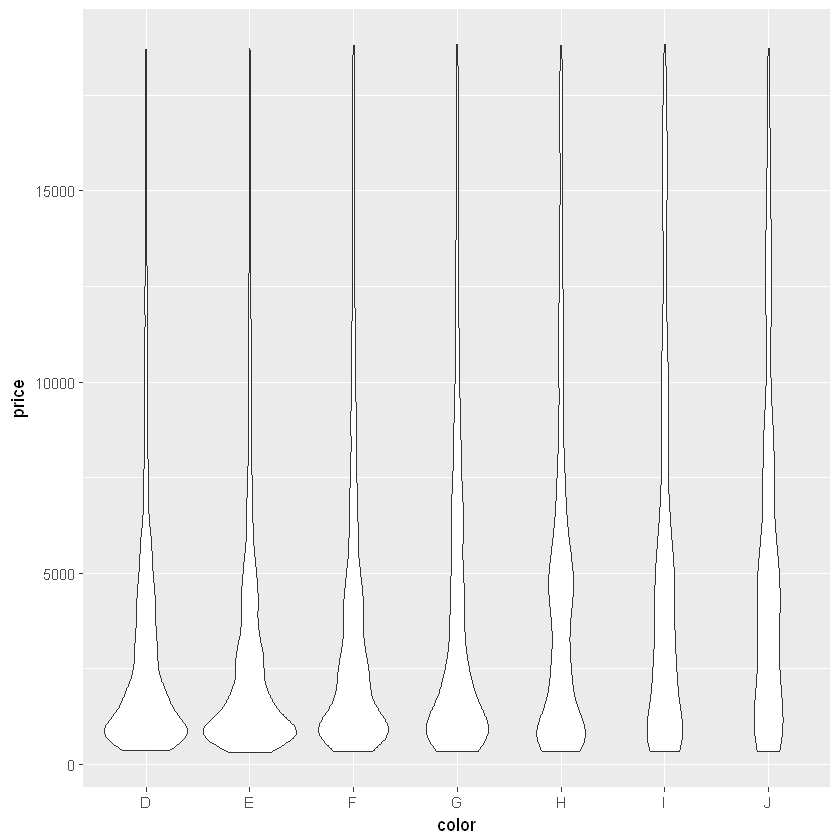

In [288]:
diamonds %>%
ggplot(aes(color, price)) +
geom_violin()

In [256]:
str(as.character(diamonds$color))

 chr [1:53940] "E" "E" "E" "I" "J" "J" "I" "H" "E" "H" "J" "J" "F" "J" "E" ...


In [251]:
str(mpg$class)

 chr [1:234] "compact" "compact" "compact" "compact" "compact" "compact" ...


In [253]:
str(mpg$hwy)

 int [1:234] 29 29 31 30 26 26 27 26 25 28 ...


In [252]:
str(diamonds$color)

 Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...


In [254]:
str(diamonds$price)

 int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...


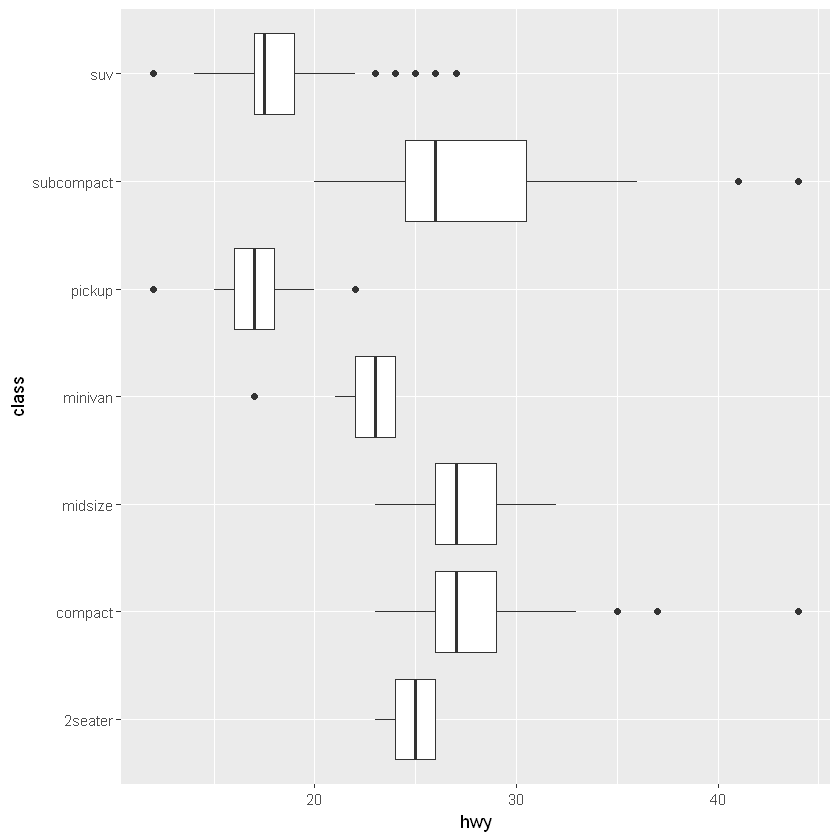

In [247]:
ggplot(mpg, aes(hwy, class)) +
  geom_boxploth()

In [272]:
library(lvplot)

Warning message:
"package 'lvplot' was built under R version 3.4.3"

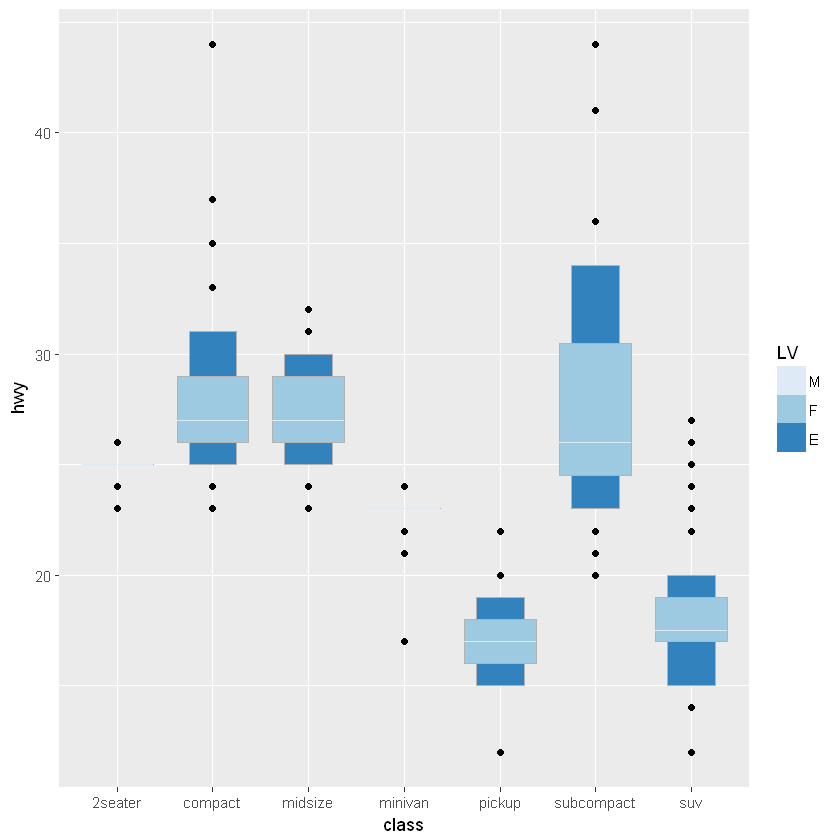

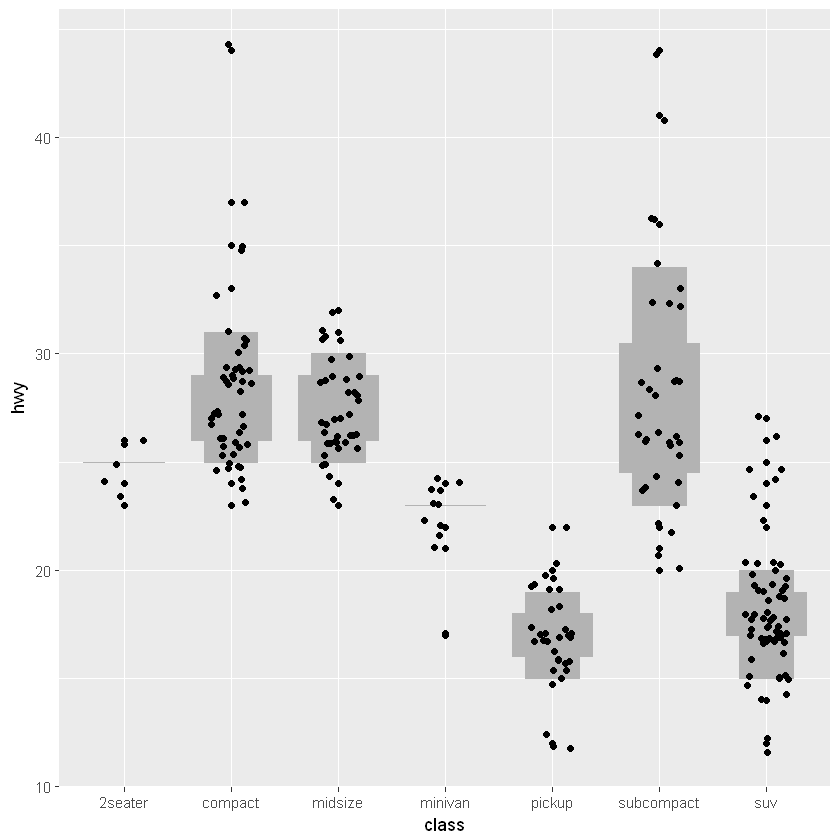

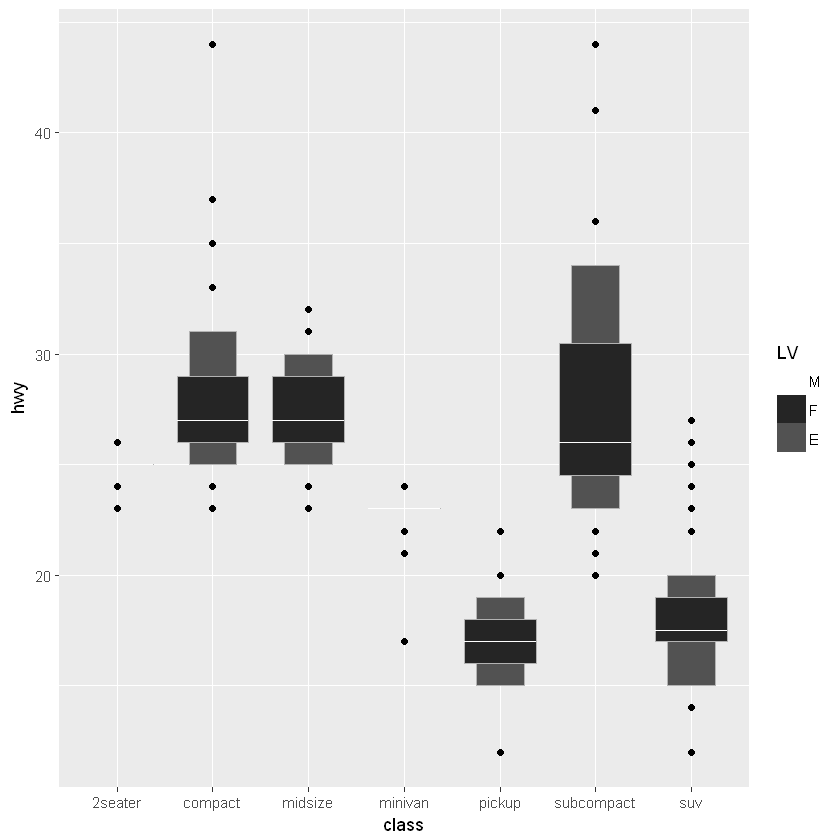

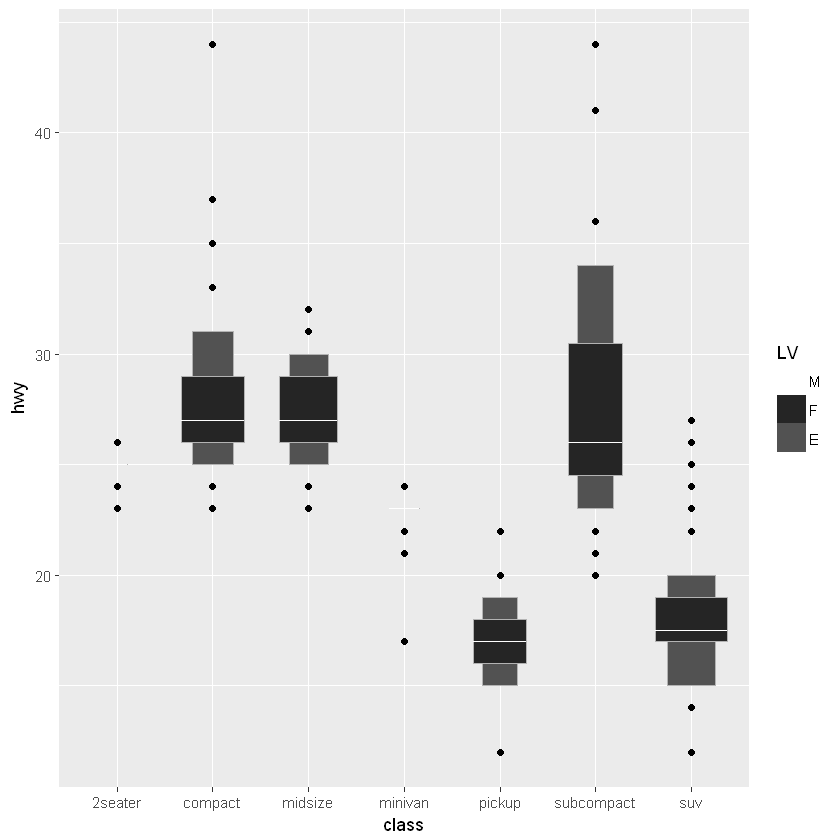

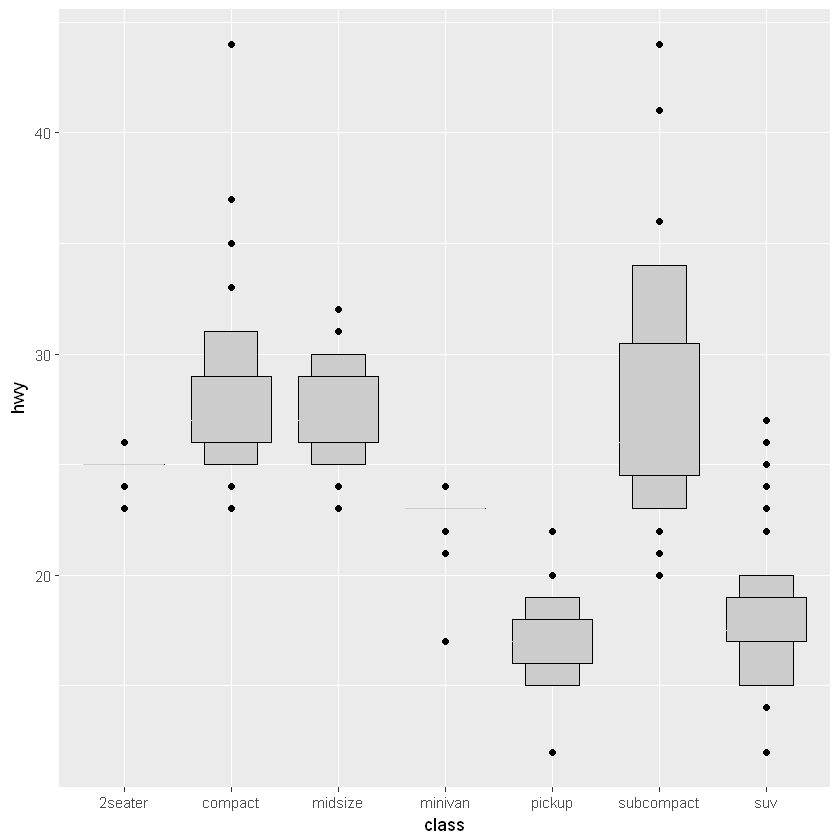

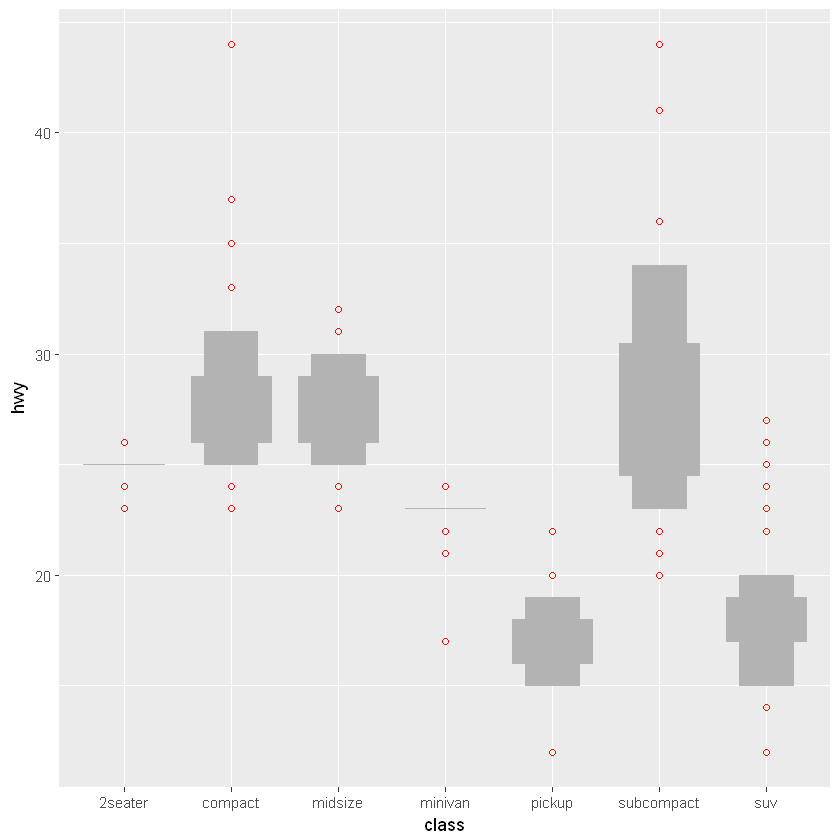

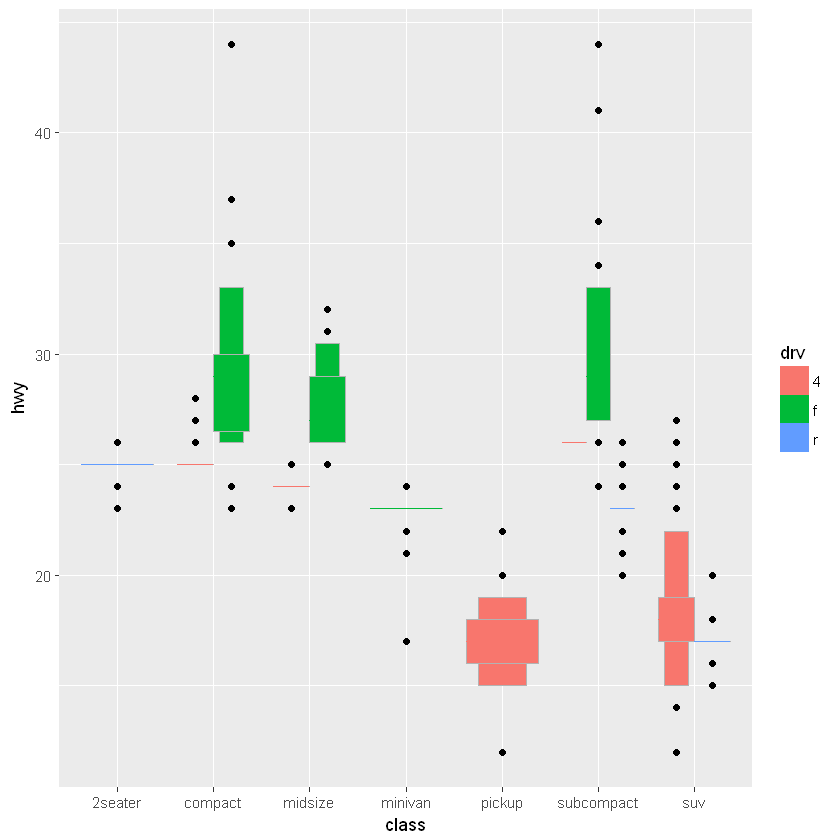

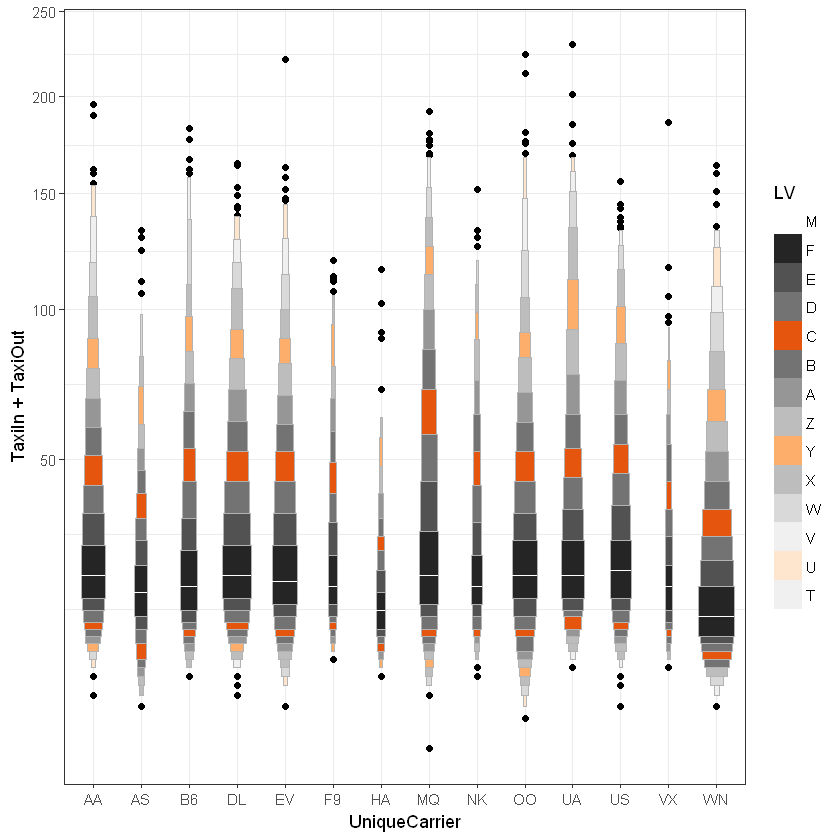

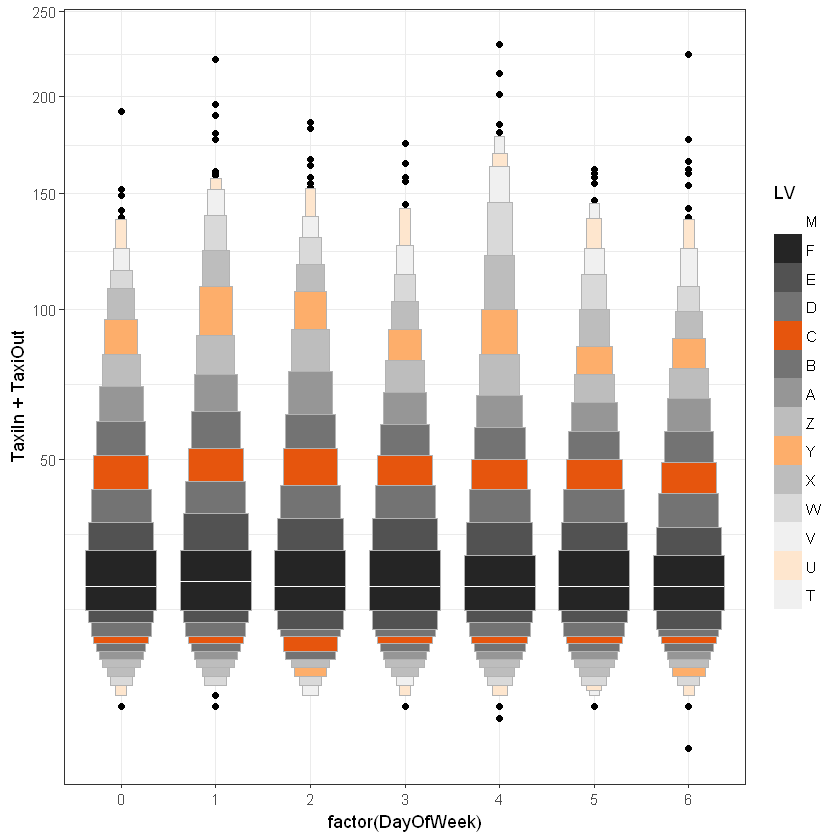

In [273]:
p <- ggplot(mpg, aes(class, hwy))
p + geom_lv(aes(fill=..LV..)) + scale_fill_brewer()
p + geom_lv() + geom_jitter(width = 0.2)
p + geom_lv(alpha=1, aes(fill=..LV..)) + scale_fill_lv()

# Outliers
p + geom_lv(varwidth = TRUE, aes(fill=..LV..)) + scale_fill_lv()
p + geom_lv(fill = "grey80", colour = "black")
p + geom_lv(outlier.colour = "red", outlier.shape = 1)

# Plots are automatically dodged when any aesthetic is a factor
p + geom_lv(aes(fill = drv))

# varwidth adjusts the width of the boxes according to the number of observations
ggplot(ontime, aes(UniqueCarrier, TaxiIn + TaxiOut)) +
  geom_lv(aes(fill = ..LV..), varwidth=TRUE) +
  scale_fill_lv() +
  scale_y_sqrt() +
  theme_bw()

ontime$DayOfWeek <- as.POSIXlt(ontime$FlightDate)$wday
ggplot(ontime, aes(factor(DayOfWeek), TaxiIn + TaxiOut)) +
  geom_lv(aes(fill = ..LV..)) +
  scale_fill_lv() +
  scale_y_sqrt() +
  theme_bw()

Dropping 12271 missing values.


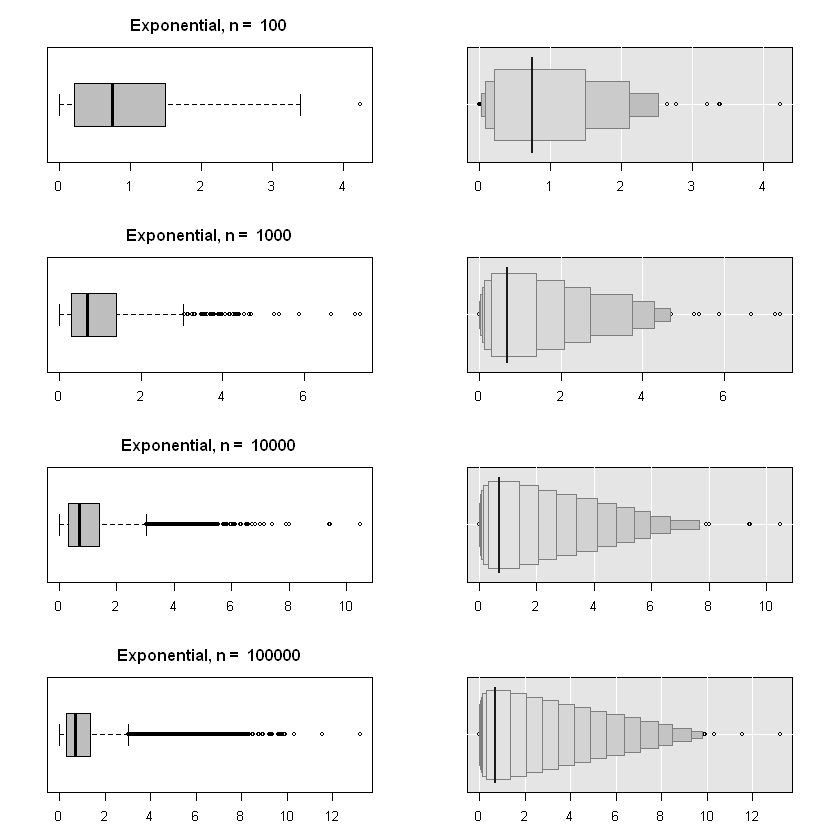

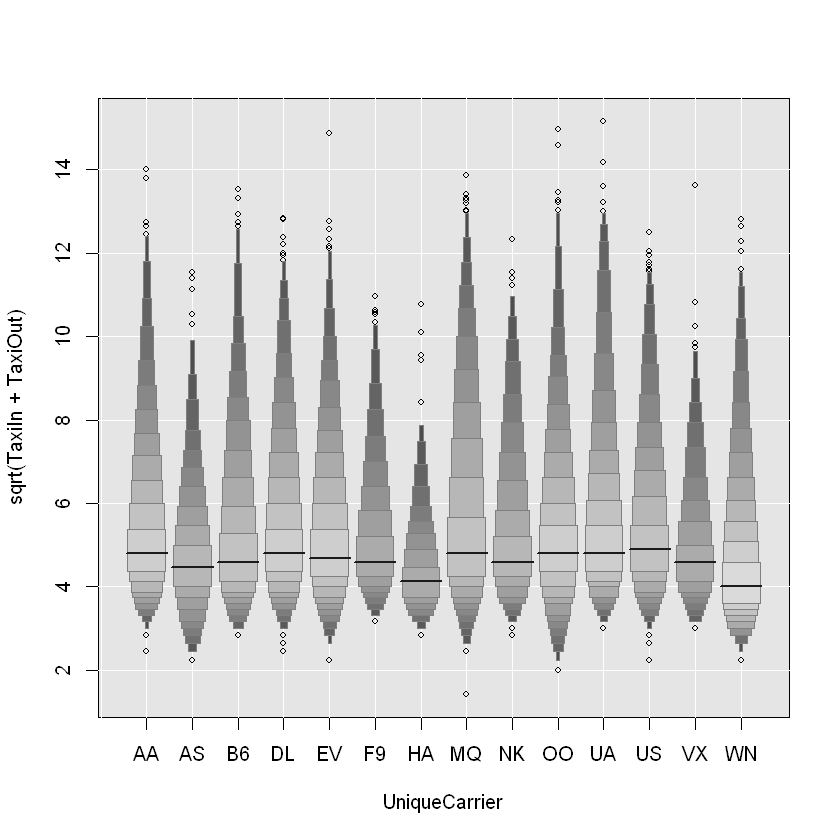

In [274]:
n <- 10
oldpar <- par()
par(mfrow=c(4,2), mar=c(3,3,3,3))
for (i in 1:4) {
  x <- rexp(10 ^ (i + 1))
  boxplot(x, col = "grey", horizontal = TRUE)
  title(paste("Exponential, n = ", length(x)))
  LVboxplot(x, col = "grey", xlab = "")
}
par(mfrow=oldpar$mfrow, mar=oldpar$mar)

with(ontime, LVboxplot(sqrt(TaxiIn + TaxiOut) ~ UniqueCarrier, horizontal=FALSE))